## Linear programming

### Task 1

Хотим максимизировать БАБКИ. А значит $$5y_1+7y_2+13y_3\to \displaystyle{\max_{y_1, y_2, y_3}}$$

Также накиним пару ограничений:

1. Больше 6 дней работать не можем $$\frac{y_1}{5000} + \frac{y_2}{4000}+\frac{y_3}{2000}\leqslant 6$$

2. На площадь $$\frac{y_1\cdot30}{1000} + \frac{y_2\cdot50}{1000} + \frac{y_3\cdot220}{1000}\leqslant 1500$$

3. Ограничения сверху $$y_1\leqslant 10000, \quad y_2\leqslant 14000, \quad y_3\leqslant 7000$$

4. Ограничения снизу $$y_1\geqslant 4500, \quad y_3\geqslant 4000$$


In [21]:
import pyomo.environ as pyo
model = pyo.ConcreteModel()
model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT) # for sensity analysis

model.y1 = pyo.Var(domain=pyo.NonNegativeReals) # если поставить NonNegativeIntegers, то в лагранжане нихуя не работает
model.y2 = pyo.Var(domain=pyo.NonNegativeReals)
model.y3 = pyo.Var(domain=pyo.NonNegativeReals)

model.days = pyo.Constraint(expr=model.y1 / 5000 + model.y2 / 4000 + model.y3 / 2000 <= 6)
model.square = pyo.Constraint(expr=model.y1 * 30 / 1000 + model.y2 * 50 / 1000 + model.y3 * 220 / 1000 <= 1500)
model.upper_y1 = pyo.Constraint(expr=model.y1  <= 10000)
model.upper_y2 = pyo.Constraint(expr=model.y2  <= 14000)
model.upper_y3 = pyo.Constraint(expr=model.y3  <= 7000)
model.lower_y1 = pyo.Constraint(expr=model.y1  >= 4500)
model.lower_y3 = pyo.Constraint(expr=model.y3  >= 4000)

model.objective = pyo.Objective(expr=5 * model.y1 + 7 * model.y2 + 12 * model.y3, sense=pyo.maximize)

opt = pyo.SolverFactory("glpk")
results = opt.solve(model)

In [22]:
print(f"headphones = {model.y1()}, phones = {model.y2()}, laptops = {model.y3()}")

headphones = 10000.0, phones = 6400.0, laptops = 4000.0


Теперь проведём анализ чувствительности. Для этого надо найти коэффициенты Лагранжана

In [16]:
for constraint in model.component_objects(pyo.Constraint, active=True): # это спросил у гпт
    for index in constraint:
        print(f'{constraint[index].name}: {model.dual[constraint[index]]}')

days: 0.0
square: 140.0
upper_y1: 0.8
upper_y2: 0.0
upper_y3: 0.0
lower_y1: 0.0
lower_y3: -18.8


С лекции известно, что коэфы лагранжа означают следующее:  если мы увеличим ограничение на 1, то максимизируемая функция повысится на этот коэф. Соответственно, чтобы маскимально повыисть прибыль, надо ослабить ограничение, которое соответствует самому большому коэфу.

Чтобы численно это показать, давайте увеличим ограничение по площади до 2000

In [80]:
import pyomo.environ as pyo
model_new = pyo.ConcreteModel()
model_new.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT) # for sensity analysis

model_new.y1 = pyo.Var(domain=pyo.NonNegativeReals) # если поставить NonNegativeIntegers, то в лагранжане нихуя не работает
model_new.y2 = pyo.Var(domain=pyo.NonNegativeReals)
model_new.y3 = pyo.Var(domain=pyo.NonNegativeReals)

model_new.days = pyo.Constraint(expr=model_new.y1 / 5000 + model_new.y2 / 4000 + model_new.y3 / 2000 <= 6)
model_new.square = pyo.Constraint(expr=model_new.y1 * 30 / 1000 + model_new.y2 * 50 / 1000 + model_new.y3 * 220 / 1000 <= 2000)
model_new.upper_y1 = pyo.Constraint(expr=model_new.y1  <= 10000)
model_new.upper_y2 = pyo.Constraint(expr=model_new.y2  <= 14000)
model_new.upper_y3 = pyo.Constraint(expr=model_new.y3  <= 7000)
model_new.lower_y1 = pyo.Constraint(expr=model_new.y1  >= 4500)
model_new.lower_y3 = pyo.Constraint(expr=model_new.y3  >= 4000)

model_new.objective = pyo.Objective(expr=5 * model_new.y1 + 7 * model_new.y2 + 12 * model_new.y3, sense=pyo.maximize)

opt = pyo.SolverFactory("glpk")
results = opt.solve(model_new)

Посмотрим, увеличилась ли прибыль?

In [81]:
print(f'before increasing square: {model.objective()}')
print(f'after increasing square: {model_new.objective()}')

before increasing square: 142800.0
after increasing square: 157300.0


### Task 2

#### Problem

Prove the optimality of the solution [10 points] 
    
$$
    x = \left(\frac{7}{3} , 0, \frac{1}{3}\right)^T
$$
    
to the following linear programming problem:
    
$$
    \begin{split}
    & 9x_1 + 3x_2 + 7x_3 \to \max\limits_{x \in \mathbb{R}^3 }\\
    \text{s.t. } & 2x_1 + x_2 + 3x_3 \leq 6 \\
    & 5x_1 + 4x_2 + x_3 \leq 12 \\
    & 3x_3 \leq 1,\\
    & x_1, x_2, x_3 \geq 0
    \end{split}
$$

but you cannot use any numerical algorithm here.

#### Solution

Первым делом заменим максимизацию на минимизацию:
$$
    \begin{split}
    & -9x_1 - 3x_2 - 7x_3 \to \min\limits_{x \in \mathbb{R}^3 }\\
    \text{s.t. } & 2x_1 + x_2 + 3x_3 \leq 6 \\
    & 5x_1 + 4x_2 + x_3 \leq 12 \\
    & 3x_3 \leq 1,\\
    & x_1, x_2, x_3 \geq 0
    \end{split}
$$

Теперь выпишем условия KKT. Сначала запишем Лагранжан

$$\mathcal{L} = -9x_1 - 3x_2 - 7x_3 + \lambda_1(2x_1 + x_2 + 3x_3 - 6) + \lambda_2(5x_1 + 4x_2 + x_3-12) + \lambda_3(3x_3 - 1) -\lambda_4 x_1 - \lambda_5x_2-\lambda_6x_3$$

1. $\nabla_x L(x^*, \lambda^*, \nu^*)=0$ 
$$
\begin{split}
&\frac{\partial L}{\partial x_1} = -9 + 2\lambda_1^* + 5\lambda_2^*-\lambda_4^*=0 \\
&\frac{\partial L}{\partial x_2} = -3 + \lambda_1^* + 4\lambda_2^* - \lambda_5^* = 0 \\
&\frac{\partial L}{\partial x_1} = -7 + 3\lambda_1^* + \lambda_2^* + 3\lambda_3^* - \lambda_6^*=0
\end{split}
$$
2. $\lambda_i^*\geqslant0$
3. $\lambda_i^* f_i(x^*)=0$
$$
\begin{split}
&\lambda_1^*(2x_1^* + x_2^* + 3x_3^* - 6)=0 \\
&\lambda_2^*(5x_1^* + 4x_2^* + x_3^*-12) = 0 \\
&\lambda_3^*(3x_3^* - 1) = 0 \\
&\lambda_4^* x_1^* = 0\\
&\lambda_5^*x_2^* = 0\\
&\lambda_6^*x_3^* = 0
\end{split}
$$
4. $f_i(x^*) \leqslant 0$

Рассмотрим случай, когда $\lambda_1=\lambda_4=\lambda_6=0$, а $\lambda_2\neq0, \, \lambda_3\neq0,\, \lambda_5\neq0$. Тогда решим систему из первого пункта:
$$
\begin{cases}
5\lambda_2^*=9\\
4\lambda_2^* - \lambda_5^* = 3\\
\lambda_2^* + 3\lambda_3^*=7
\end{cases}
\implies (\lambda_2^*, \lambda_3^*, \lambda_5^*) = \left(\frac{9}{5}, \frac{26}{15}, \frac{21}{5}\right)\geqslant0
$$

Из третьего пункта получаем, что $x_2^*=0, \,x_3^*=\frac{1}{3}$. Подставив в $\lambda_2^*(5x_1^* + 4x_2^* + x_3^*-12) = 0$, получаем $x_1^*=\frac{7}{3}$

То есть мы нашли точку $(x_1, x_2, x_3)=\left(\frac{7}{3}, 0, \frac{1}{3}\right)$, для который выполнены условия KKT. Но с лекции знаем, что если есть решение прямой задачи **или** двойственной и оно конечно, то есть сильная двойственность, а соответственно условия KKT становятся достаточными.

## Gradient Descent

### Task 1

#### Problem

We will assume nothing about the convexity of $f$.  We will show that gradient descent reaches an $\varepsilon$-substationary point $x$, such that $\|\nabla f(x)\|_2 \leq \varepsilon$, in $O(1/\varepsilon^2)$ iterations. Important note: you may use here Lipschitz parabolic upper bound: 
    
$$
    f(y) \leq f(x) + \nabla f(x)^T (y-x) + \frac{L}{2} \|y-x\|_2^2, \;\;\;
    \text{for all $x,y$}.  
$$ {#eq-quad_ub}

* Plug in $y = x^{k+1} = x^{k} - \alpha \nabla f(x^k), x = x^k$ to (1) to show that 

$$
        f(x^{k+1}) \leq f(x^k) - \Big (1-\frac{L\alpha}{2} \Big) \alpha \|\nabla f(x^k)\|_2^2.
$$

* Use $\alpha \leq 1/L$, and rearrange the previous result, to get 

$$
        \|\nabla f(x^k)\|_2^2 \leq \frac{2}{\alpha} \left( f(x^k) - f(x^{k+1}) \right).
$$

* Sum the previous result over all iterations from $1,\ldots,k+1$ to establish
    
$$
        \sum_{i=0}^k \|\nabla f(x^{i})\|_2^2 \leq 
        \frac{2}{\alpha} ( f(x^{0}) - f^*).
$$

* Lower bound the sum in the previous result to get 

$$
        \min_{i=0,\ldots,k} \|\nabla f(x^{i}) \|_2 
        \leq \sqrt{\frac{2}{\alpha(k+1)} (f(x^{0}) - f^*)}, 
$$
which establishes the desired $O(1/\varepsilon^2)$ rate for achieving $\varepsilon$-substationarity.

#### Solution

$$f(y) \leqslant f(x) + \nabla f(x)^T (y-x) + \frac{L}{2} \|y-x\|_2^2$$

$$f(x_{k+1}) \leqslant f(x_k) + \nabla f(x_k)^T (-\alpha \nabla f(x_k)) + \frac{L}{2} \|-\alpha \nabla f(x_k)\|_2^2$$

$$f(x_{k+1}) \leqslant f(x_k) - \alpha\|\nabla f(x_k)\|^2  + \frac{L\alpha^2}{2} \|\nabla f(x_k)\|_2^2$$

$$f(x_{k+1}) \leqslant f(x_k) - \alpha\|\nabla f(x_k)\|^2 \left(1 - \frac{L\alpha}{2}\right)$$

As we know that $\alpha\leqslant\frac{1}{L}\implies L\leqslant\frac{1}{L}$

$$f(x_{k+1}) \leqslant f(x_k) - \alpha\|\nabla f(x_k)\|^2 \left(1 - \frac{1}{2}\right)$$

$$\|\nabla f(x_k)\|_2^2 \leqslant \frac{2}{\alpha} \left( f(x_k) - f(x_{k+1}) \right)$$

$$\sum_{i=0}^k \|\nabla f(x_{i})\|_2^2 \leqslant \frac{2}{\alpha}\sum_{i=0}^k ( f(x_{i}) - f(x_{i+1}))=\frac{2}{\alpha}\left(f(x_0) - f(x_1) + f(x_1) - f(x_2)+ ...\right)$$

$$\sum_{i=0}^k \|\nabla f(x_{i})\|_2^2 \leqslant \frac{2}{\alpha} ( f(x_{0}) - f(x_{k+1}))$$

We also know that $f(x_{k+1})\geqslant f^*$

$$\min_{i=0,\ldots,k} \|\nabla f(x_{i})\|_2^2 \cdot(k+1) \leqslant \frac{2}{\alpha} ( f(x_{0}) - f(x_{k+1}))\leqslant \frac{2}{\alpha} ( f(x_{0}) - f^*)$$

$$\min_{i=0,\ldots,k} \|\nabla f(x_{i})\|_2\leqslant \sqrt{\frac{2}{\alpha(k+1)} ( f(x_{0}) - f^*)}$$

As we want $\|\nabla f(x_{i})\|_2 \leqslant \varepsilon\implies\sqrt{\frac{2}{\alpha(k+1)} ( f(x_{0}) - f^*)}\leqslant\varepsilon\implies\frac{2}{\alpha(k+1)} ( f(x_{0}) - f^*)\leqslant\varepsilon^2\implies k\geqslant\frac{2}{\alpha\varepsilon^2}( f(x_{0}) - f^*) - 1\implies k\sim\mathcal{O}(\frac{1}{\varepsilon^2})$


### Task 2

In [206]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

def generate_quadratic_problem(n, k):
    diag = np.random.choice(k, size=n) + 1
    diag[np.argmin(diag)] = 1 # ставим на место минимального элемента 1, а на место максимального k
    diag[np.argmax(diag)] = k
    A = np.diag(diag)

    x0 = np.ones((n, ))

    b = np.random.randn(n)
    return x0, A, b

def gradient_quadratic_function(A, b, x):
    return A @ x + b

def gradient_descent(n, k):
    x0, A, b = generate_quadratic_problem(n, k)
    x = x0.copy()
    grad_x0 = gradient_quadratic_function(A, b, x0)

    lr = 2 / (1 + k)

    num_iter = 0

    for i in range(1000):
        num_iter += 1
        grad = gradient_quadratic_function(A, b, x)
        x -= lr * grad
        if grad.T @ grad <= 1e-5 * grad_x0.T @ grad_x0:
            break
    return num_iter
        
def run_exp(n, num_run=5):
    ks = np.concatenate((np.array([1, 10, 50]), np.linspace(100, 500, 50)))
    results = defaultdict(list)
    for i in range(num_run):
        res_cond = defaultdict(list)
        for k in ks:
            res_cond[k].append(gradient_descent(n, int(k)))
        results[i] = res_cond
    return results

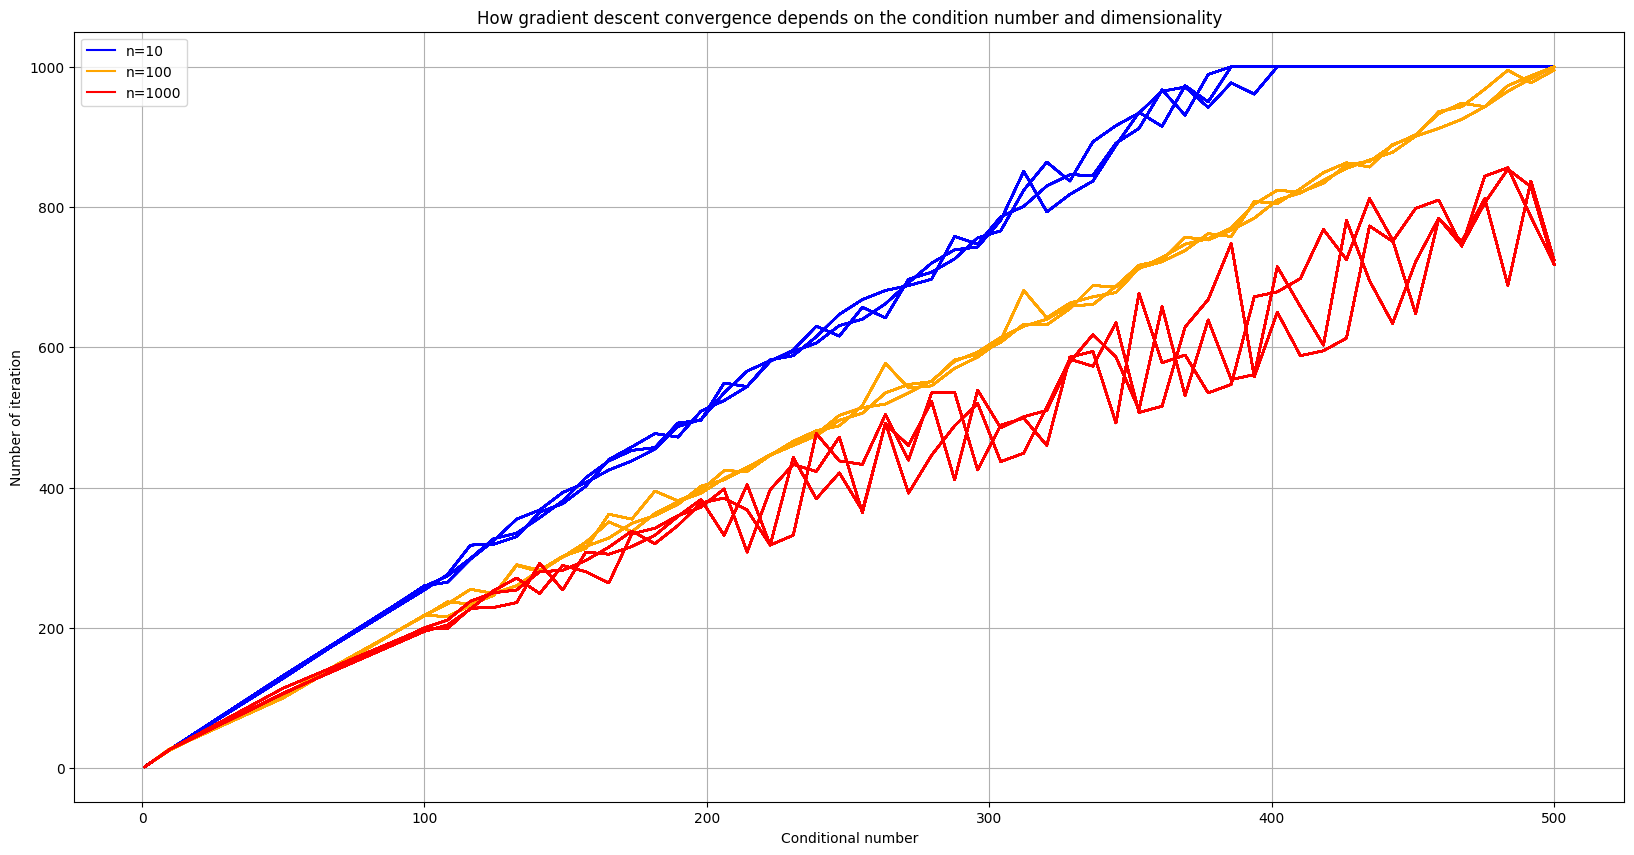

In [208]:
ns = np.logspace(1, 3, 3, dtype=int)
results = {}
num_runs = 3

for n in ns:
    results[n] = run_exp(n, 3)

colors = ['blue', 'orange', 'red']
plt.figure(figsize=(20, 10))

for color_id, n in enumerate(ns):
    label = True
    for i in range(3):
        for k in results[n][i]:
            if label:
                plt.plot(results[n][i].keys(), results[n][i].values(), color=colors[color_id], label=f'n={n}')
                label = False
            else:
                plt.plot(results[n][i].keys(), results[n][i].values(), color=colors[color_id])

plt.xlabel('Conditional number')
plt.ylabel('Number of iteration')
plt.title('How gradient descent convergence depends on the condition number and dimensionality')
plt.grid()
plt.legend()
plt.show()

Что видим? Первое, это то, что при увеличении числа обусловленности растёт количество итераций. Объясняется этот факт тем, что задача тупо становится *плохообусловленной*, т.е. сложнее. Второе, что необычно, это падение количества итераций при увеличении размерности. Необычно это потому, что теоретически зависимости между этим вообще нет: мы всё так же считаем градиент и вычитаем его из прошлого значения х (должно увеличится количество операций, а не итераций). Единственное объяснение, которое я придумал следующее: при увеличении размерности матрица А будет иметь всего лишь k различных чисел (т. е. k << n), распределение этих чисел будет максимально равномерным (ну вы поняли, про что я🙃), и это как-то упрощает задачу в том плане, что она становится лучше обусловленной (хотя всё равно там есть максимальное k). Ещё видно, что самые разнообразные результаты получились именно у самой большой размерности. Есть ли связь с тем, что я писал раньше -- хз. Но я готов поставить квартиру, которой у меня нет, что приколы тут именно из-за матрицы А.

## Accelerated methods

### Task 1

**Local Convergence of Heavy Ball Method.** [20 points] We will work with the heavy ball method in this problem

$$
    \tag{HB}
    x_{k+1} = x_k - \alpha \nabla f(x_k) + \beta (x_k - x_{k-1})
$$

It is known, that for the quadratics the best choice of hyperparameters is $\alpha^* = \dfrac{4}{(\sqrt{L} + \sqrt{\mu})^2}, \beta^* = \dfrac{(\sqrt{L} - \sqrt{\mu})^2}{(\sqrt{L} + \sqrt{\mu})^2}$, which ensures accelerated linear convergence for a strongly convex quadratic function.

Consider the following continuously differentiable, strongly convex with parameter $\mu$, and smooth function with parameter $L$:

$$
    f(x) = 
    \begin{cases} 
    \frac{25}{2}x^2, & \text{if } x < 1 \\
    \frac12x^2 + 24x - 12, & \text{if } 1 \leq x < 2 \\
    \frac{25}{2}x^2 - 24x + 36, & \text{if } x \geq 2
    \end{cases}
    \quad
    \nabla f(x) = 
    \begin{cases} 
    25x, & \text{if } x < 1 \\
    x + 24, & \text{if } 1 \leq x < 2 \\
    25x - 24, & \text{if } x \geq 2
    \end{cases}
$$

1. How to prove, that the given function is convex? Strongly convex? Smooth?

Показывать выпуклость мы не будем, сразу покажем сильную выпуклость. Для этого ищем гессиан:

$$\nabla^2 f(x) = 
    \begin{cases} 
    25, & \text{if } x < 1 \\
    1, & \text{if } 1 \leq x < 2 \\
    25, & \text{if } x \geq 2
    \end{cases}$$

Видим, что он больше 1, значит делаем вывод о сильной выпуклости с константой $\mu=1$

Теперь докажем, что функция гладкая. Для этого надо показать, что у неё липшецев градиент, то есть $$|\nabla f(y) - \nabla f(x)|\leqslant L|y-x|.$$ Запишем это для каждого промежутка $$|25y-25x|\leqslant L|y-x|, \quad \text{if } x < 1$$ $$|y - x|\leqslant L|y - x|, \quad\text{if } 1 \leq x < 2$$ $$|25y - 25x|\leqslant L|y-x|, \quad \text{if } x \geq 2$$

Видно, что чтобы все 3 неравенства выполнялись, $L$ должно быть равна 25. Также надо проверить граничные точки на равенство, но прекрасно видно, что там всё хорошо. 

2. Find the constants $\mu$ and $L$ for a given function.

Выше нашли, $\mu=1$, $L=25$

3. Plot the function value for $x \in [-4, 4]$.

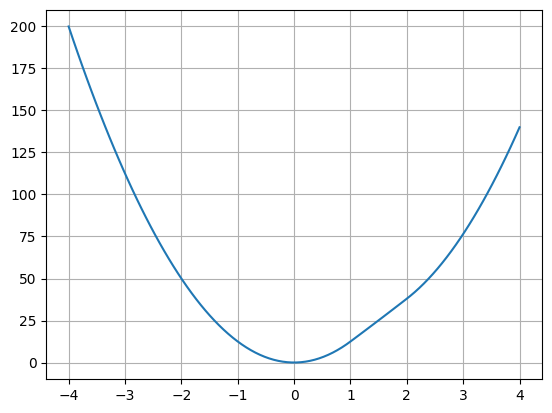

In [246]:
def f(x):
    mask1 = x < 1
    mask2 = (x >= 1) & (x < 2)
    mask3 = x >= 2

    ret = np.zeros_like(x)

    ret[mask1] = 12.5 * x[mask1] ** 2
    ret[mask2] = 0.5 * x[mask2] ** 2 + 24 * x[mask2] - 12
    ret[mask3] = 12.5 * x[mask3] ** 2 - 24 * x[mask3] + 36

    return ret

x = np.linspace(-4, 4, 100)
y = f(x)

plt.plot(x, y)
plt.grid()
plt.show()

4. Run the Heavy Ball method for the function with optimal hyperparameters $\alpha^* = \dfrac{4}{(\sqrt{L} + \sqrt{\mu})^2}, \beta^* = \dfrac{(\sqrt{L} - \sqrt{\mu})^2}{(\sqrt{L} + \sqrt{\mu})^2}$ for quadratic function, starting from $x_0 = 3.5$.

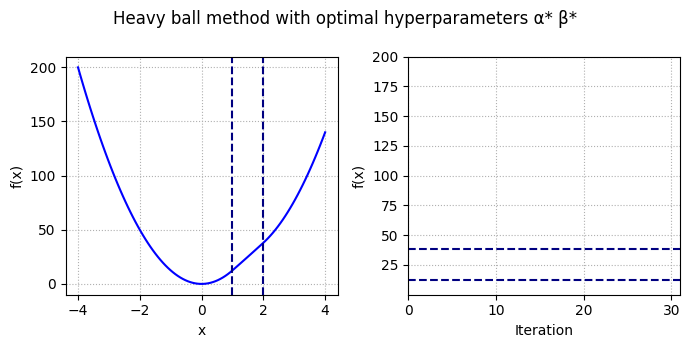

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Gradient of the function
def grad_f(x):
    if x < 1:
        return 25 * x
    elif x >= 2:
        return 25 * x - 24
    else:
        return x + 24
    

# Heavy Ball method implementation
def heavy_ball_method(alpha, beta, x0, num_iterations):
    x = np.zeros(num_iterations + 1)
    x_prev = x0
    x_curr = x0  # Initialize x[1] same as x[0] to start the algorithm
    for i in range(num_iterations):
        x[i] = x_curr
        x_new = x_curr - alpha * grad_f(x_curr) + beta * (x_curr - x_prev)
        x_prev = x_curr
        x_curr = x_new
    x[num_iterations] = x_curr
    return x

# Parameters
L = 25
mu = 1
alpha_star = 4 / (np.sqrt(L) + np.sqrt(mu)) ** 2
beta_star = (np.sqrt(L) - np.sqrt(mu)) ** 2 / (np.sqrt(L) + np.sqrt(mu)) ** 2
x0 = 3.5
num_iterations = 30

# Generate the trajectory of the method
trajectory = heavy_ball_method(alpha_star, beta_star, x0, num_iterations)

# Setup the figure and axes for the animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.5))
fig.suptitle("Heavy ball method with optimal hyperparameters α* β*")

# Function for updating the animation
def update(i):
    ax1.clear()
    ax2.clear()

    # Plot f(x) and trajectory
    x_vals = np.linspace(-4, 4, 100)
    f_vals = np.piecewise(x_vals, [x_vals < 1, (x_vals >= 1) & (x_vals < 2), x_vals >= 2],
                        [lambda x: 12.5 * x**2, lambda x: .5 * x**2 + 24 * x - 12, lambda x: 12.5 * x**2 - 24 * x + 36])
    ax1.plot(x_vals, f_vals, 'b-')
    ax1.plot(trajectory[:i], [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]], 'ro-')
    # Add vertical dashed lines at x=1 and x=2 on the left subplot
    ax1.axvline(x=1, color='navy', linestyle='--')
    ax1.axvline(x=2, color='navy', linestyle='--')

    # Plot function value from iteration
    f_trajectory = [None for x in trajectory]
    f_trajectory[:i] = [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]]
    ax2.plot(range(len(trajectory)), f_trajectory, 'ro-')
    ax2.set_xlim(0, len(trajectory))
    ax2.set_ylim(min(f_vals), max(f_vals))
    # Add horizontal dashed lines at f(1) and f(2) on the right subplot
    f_1 = 12.5 * 1.0**2
    f_2 = .5 * 2.**2 + 24 * 2. - 12
    ax2.axhline(y=f_1, color='navy', linestyle='--')
    ax2.axhline(y=f_2, color='navy', linestyle='--')

    # ax1.set_title("Function f(x) and Trajectory")
    ax1.set_xlabel("x")
    ax1.set_ylabel("f(x)")
    ax1.grid(linestyle=":")

    # ax2.set_title("Function Value from Iteration")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("f(x)")
    ax2.grid(linestyle=":")

    plt.tight_layout()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, repeat=False, interval=100)
HTML(ani.to_jshtml())

Ну вроде похоже

5. Change the starting point to $x_0 = 3.4$. What do you see? How could you name such a behavior of the method?

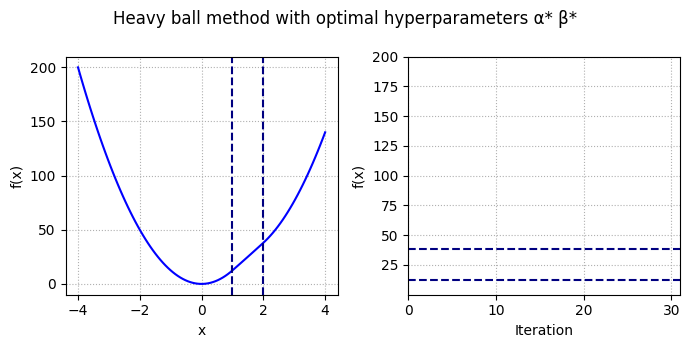

In [244]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Gradient of the function
def grad_f(x):
    if x < 1:
        return 25 * x
    elif x >= 2:
        return 25 * x - 24
    else:
        return x + 24
    

# Heavy Ball method implementation
def heavy_ball_method(alpha, beta, x0, num_iterations):
    x = np.zeros(num_iterations + 1)
    x_prev = x0
    x_curr = x0  # Initialize x[1] same as x[0] to start the algorithm
    for i in range(num_iterations):
        x[i] = x_curr
        x_new = x_curr - alpha * grad_f(x_curr) + beta * (x_curr - x_prev)
        x_prev = x_curr
        x_curr = x_new
    x[num_iterations] = x_curr
    return x

# Parameters
L = 25
mu = 1
alpha_star = 4 / (np.sqrt(L) + np.sqrt(mu)) ** 2
beta_star = (np.sqrt(L) - np.sqrt(mu)) ** 2 / (np.sqrt(L) + np.sqrt(mu)) ** 2
x0 = 3.4
num_iterations = 30

# Generate the trajectory of the method
trajectory = heavy_ball_method(alpha_star, beta_star, x0, num_iterations)

# Setup the figure and axes for the animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.5))
fig.suptitle("Heavy ball method with optimal hyperparameters α* β*")

# Function for updating the animation
def update(i):
    ax1.clear()
    ax2.clear()

    # Plot f(x) and trajectory
    x_vals = np.linspace(-4, 4, 100)
    f_vals = np.piecewise(x_vals, [x_vals < 1, (x_vals >= 1) & (x_vals < 2), x_vals >= 2],
                        [lambda x: 12.5 * x**2, lambda x: .5 * x**2 + 24 * x - 12, lambda x: 12.5 * x**2 - 24 * x + 36])
    ax1.plot(x_vals, f_vals, 'b-')
    ax1.plot(trajectory[:i], [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]], 'ro-')
    # Add vertical dashed lines at x=1 and x=2 on the left subplot
    ax1.axvline(x=1, color='navy', linestyle='--')
    ax1.axvline(x=2, color='navy', linestyle='--')

    # Plot function value from iteration
    f_trajectory = [None for x in trajectory]
    f_trajectory[:i] = [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]]
    ax2.plot(range(len(trajectory)), f_trajectory, 'ro-')
    ax2.set_xlim(0, len(trajectory))
    ax2.set_ylim(min(f_vals), max(f_vals))
    # Add horizontal dashed lines at f(1) and f(2) on the right subplot
    f_1 = 12.5 * 1.0**2
    f_2 = .5 * 2.**2 + 24 * 2. - 12
    ax2.axhline(y=f_1, color='navy', linestyle='--')
    ax2.axhline(y=f_2, color='navy', linestyle='--')

    # ax1.set_title("Function f(x) and Trajectory")
    ax1.set_xlabel("x")
    ax1.set_ylabel("f(x)")
    ax1.grid(linestyle=":")

    # ax2.set_title("Function Value from Iteration")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("f(x)")
    ax2.grid(linestyle=":")

    plt.tight_layout()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, repeat=False, interval=100)
HTML(ani.to_jshtml())

Видим, что в этот раз мы перепрыгиваем оптимум и не можем в него прийти. Если честно, у меня ноль идей, как это называется. В статье это называют limit cycle overlaid.

6. Change the hyperparameter $\alpha^{\text{Global}} = \frac2L, \beta^{\text{Global}} = \frac{\mu}{L}$ and run the method again from $x_0 = 3.4$. Check whether you have accelerated convergence here.

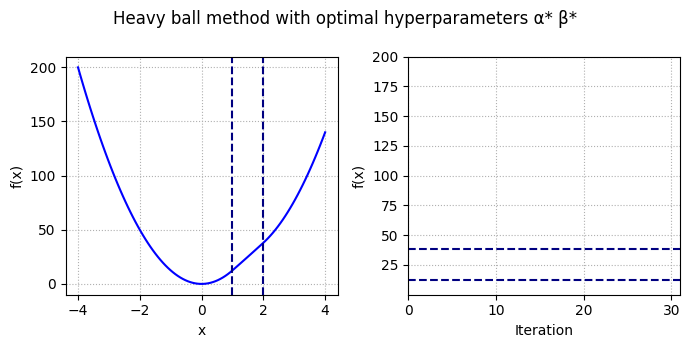

In [245]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Gradient of the function
def grad_f(x):
    if x < 1:
        return 25 * x
    elif x >= 2:
        return 25 * x - 24
    else:
        return x + 24
    

# Heavy Ball method implementation
def heavy_ball_method(alpha, beta, x0, num_iterations):
    x = np.zeros(num_iterations + 1)
    x_prev = x0
    x_curr = x0  # Initialize x[1] same as x[0] to start the algorithm
    for i in range(num_iterations):
        x[i] = x_curr
        x_new = x_curr - alpha * grad_f(x_curr) + beta * (x_curr - x_prev)
        x_prev = x_curr
        x_curr = x_new
    x[num_iterations] = x_curr
    return x

# Parameters
L = 25
mu = 1
# alpha_star = 4 / (np.sqrt(L) + np.sqrt(mu)) ** 2
alpha_star = 2 / L
# beta_star = (np.sqrt(L) - np.sqrt(mu)) ** 2 / (np.sqrt(L) + np.sqrt(mu)) ** 2
beta_star = mu / L
x0 = 3.4
num_iterations = 30

# Generate the trajectory of the method
trajectory = heavy_ball_method(alpha_star, beta_star, x0, num_iterations)

# Setup the figure and axes for the animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.5))
fig.suptitle("Heavy ball method with optimal hyperparameters α* β*")

# Function for updating the animation
def update(i):
    ax1.clear()
    ax2.clear()

    # Plot f(x) and trajectory
    x_vals = np.linspace(-4, 4, 100)
    f_vals = np.piecewise(x_vals, [x_vals < 1, (x_vals >= 1) & (x_vals < 2), x_vals >= 2],
                        [lambda x: 12.5 * x**2, lambda x: .5 * x**2 + 24 * x - 12, lambda x: 12.5 * x**2 - 24 * x + 36])
    ax1.plot(x_vals, f_vals, 'b-')
    ax1.plot(trajectory[:i], [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]], 'ro-')
    # Add vertical dashed lines at x=1 and x=2 on the left subplot
    ax1.axvline(x=1, color='navy', linestyle='--')
    ax1.axvline(x=2, color='navy', linestyle='--')

    # Plot function value from iteration
    f_trajectory = [None for x in trajectory]
    f_trajectory[:i] = [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]]
    ax2.plot(range(len(trajectory)), f_trajectory, 'ro-')
    ax2.set_xlim(0, len(trajectory))
    ax2.set_ylim(min(f_vals), max(f_vals))
    # Add horizontal dashed lines at f(1) and f(2) on the right subplot
    f_1 = 12.5 * 1.0**2
    f_2 = .5 * 2.**2 + 24 * 2. - 12
    ax2.axhline(y=f_1, color='navy', linestyle='--')
    ax2.axhline(y=f_2, color='navy', linestyle='--')

    # ax1.set_title("Function f(x) and Trajectory")
    ax1.set_xlabel("x")
    ax1.set_ylabel("f(x)")
    ax1.grid(linestyle=":")

    # ax2.set_title("Function Value from Iteration")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("f(x)")
    ax2.grid(linestyle=":")

    plt.tight_layout()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, repeat=False, interval=100)
HTML(ani.to_jshtml())

Теперь всё починилось. Почему так происходит? Мы взяли оптимальные гиперпараметры для квадратичной задачи и попытались воспользовать ими в неквадратичной задаче; получилось, что сходомость зависит от точки старта. Но далее мы взяли другие гиперпараметры и всё стало хорошо.

### Task 2

[40 points] In this problem we will work with accelerated methods applied to the logistic regression problem. A good visual introduction to the topic is available here.
Logistic regression is a standard model in classification tasks. For simplicity, consider only the case of binary classification. Informally, the problem is formulated as follows: There is a training sample $\{(a_i, b_i)\}_{i=1}^m$, consisting of $m$ vectors $a_i \in \mathbb{R}^n$ (referred to as features) and corresponding numbers $b_i \in \{-1, 1\}$ (referred to as classes or labels). The goal is to construct an algorithm $b(\cdot)$, which for any new feature vector $a$ automatically determines its class $b(a) \in \{-1, 1\}$.
In the logistic regression model, the class determination is performed based on the sign of the linear combination of the components of the vector $a$ with some fixed coefficients $x \in \mathbb{R}^n$:
$$
b(a) := \text{sign}(\langle a, x \rangle).
$$
The coefficients $x$ are the parameters of the model and are adjusted by solving the following optimization problem:
$$
\tag{LogReg}
\min_{x \in \mathbb{R}^n} \left( \frac{1}{m} \sum_{i=1}^m \ln(1 + \exp(-b_i \langle a_i, x \rangle)) + \frac{\lambda}{2} \|x\|^2 \right),
$$
where $\lambda \geq 0$ is the regularization coefficient (a model parameter).

1. Will the LogReg problem be convex for $\lambda = 0$? What is the gradient of the objective function? Will it be strongly convex? What if you will add regularization with $\lambda > 0$?

Сначала найдём градиенти и гессиан, а уже потом ответим на остальные вопросы.

$$f(x) = \frac{1}{m} \sum_{i=1}^m \ln(1 + \exp(-b_i \langle a_i, x \rangle)) + \frac{\lambda}{2} \|x\|^2$$

$$\nabla f(x) = \frac{1}{m} \sum_{i=1}^m-\frac{\exp(-b_i \langle a_i, x \rangle)b_i a_i}{1 + \exp(-b_i \langle a_i, x \rangle)} + \lambda x$$

$$\nabla^2 f(x) = \frac{1}{m} \sum_{i=1}^mb_ia_i\frac{\exp(-b_i \langle a_i, x \rangle)b_i a_i^{\top}}{(1 + \exp(-b_i \langle a_i, x \rangle)^2)} + \lambda \text{I}=\frac{1}{m} \sum_{i=1}^ma_ia_i^{\top}\frac{\exp(-b_i \langle a_i, x \rangle)}{(1 + \exp(-b_i \langle a_i, x \rangle)^2)} + \lambda \text{I}$$

Также помним, что функция выпукла $\iff\nabla^2f\geqslant 0$

Заметим, что $a_ia_i^{\top}\geqslant0$, т.к. $$\forall x\in\mathbb{R}^n \quad \underbrace{x^{\top}a_i}_{y^{\top}}\underbrace{a_i^{\top}x_i}_{y}=\|y\|^2\geqslant0$$

При $\lambda=0$ $$\nabla^2 f(x)=\frac{1}{m} \sum_{i=1}^ma_ia_i^{\top}\underbrace{\frac{\exp(-b_i \langle a_i, x \rangle)}{(1 + \exp(-b_i \langle a_i, x \rangle)^2)}}_{\geqslant0}\geqslant0$$

То есть функция выпуклая. При этом сильной выпуклости тут не будет, так как нельзя подобрать $\mu>0$.

Если же рассмотреть случай с $\lambda>0$, то $$\nabla^2 f(x)=\frac{1}{m} \sum_{i=1}^ma_ia_i^{\top}\frac{\exp(-b_i \langle a_i, x \rangle)}{(1 + \exp(-b_i \langle a_i, x \rangle)^2)} + \lambda \text{I}\geqslant\lambda \text{I} $$

А значит функция будет $\lambda$-сильно выпуклой.

2. We will work with the real-world data for $A$ and $b$: take the mushroom dataset. Be careful, you will need to predict if the mushroom is poisonous or edible. A poor model can cause death in this exercise.

In [247]:
import requests
from sklearn.datasets import load_svmlight_file

# URL of the file to download
url = 'https://hse24.fmin.xyz/files/mushrooms.txt'

# Download the file and save it locally
response = requests.get(url)
dataset = 'mushrooms.txt'

# Ensure the request was successful
if response.status_code == 200:
    with open(dataset, 'wb') as f:
        f.write(response.content)

    # Load the dataset from the downloaded file
    data = load_svmlight_file(dataset)
    A, b = data[0].toarray(), data[1]
    n, d = A.shape

    print("Data loaded successfully.")
    print(f"Number of samples: {n}, Number of features: {d}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

Data loaded successfully.
Number of samples: 8124, Number of features: 112


3. Divide the data into two parts: training and test. We will train the model on the $A_{train}$, $b_{train}$ and measure the accuracy of the model on the $A_{test}$, $b_{test}$.

In [248]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=214)

In [251]:
b_train = (b_train - 1) * 2 -1 
b_test = (b_test - 1) * 2 -1 

4. For the training part $A_{train}$, $b_{train}$, estimate the constants $\mu, L$ of the training/optimization problem. Use the same small value $\lambda$ for all experiments

В качестве $\lambda$ возьмём 0.1.

Теперь оценим $L$. Для этого надо найти константу липшеца для градиента. Только перед этим немного упростим градиент функции $$\nabla f(x) = \frac{1}{m} \sum_{i=1}^m-\frac{\exp(-b_i \langle a_i, x \rangle)b_i a_i}{1 + \exp(-b_i \langle a_i, x \rangle)} + \lambda x=\frac{1}{m} \sum_{i=1}^m-\frac{b_i a_i}{1 + \exp(b_i \langle a_i, x \rangle)} + \lambda x$$

$$\|f(x) - f(y)\|\leqslant\left\|\frac{1}{m}\sum -\frac{b_i a_i}{1 + \exp(b_i \langle a_i, x \rangle)} + \lambda x - \frac{1}{m}\sum -\frac{b_i a_i}{1 + \exp(b_i \langle a_i, y \rangle)} - \lambda y\right\|\leqslant\frac{1}{m}\sum\left\|b_i a_i\left(\frac{1}{1 + \exp(b_i \langle a_i, x \rangle)} - \frac{1}{1 + \exp(b_i \langle a_i, y \rangle)}\right) + \lambda (x-y)\right\|\leqslant\\\leqslant\frac{1}{m}\sum\left|b_i\left(\frac{1}{1 + \exp(b_i \langle a_i, x \rangle)} - \frac{1}{1 + \exp(b_i \langle a_i, y \rangle)}\right)\right|\left\|a_i\right\| + \lambda\|x-y\|\leqslant\frac{1}{m}\sum\frac{1}{2}|b_i|^2\|a_i\|^2\|x-y\|+\lambda\|x-y\|=\left(\frac{1}{2m}\sum\|a_i\|^2+\lambda\right)\|x-y\|=\left(\frac{1}{2m}\|A\|^2_F + \lambda\right)\|x-y\|$$

То есть $L = \frac{1}{2m}\|A\|^2_F + \lambda$

In [268]:
lambda_ = mu = 0.1
L = np.linalg.norm(A_train) ** 2 / (2 * A_train.shape[0]) + lambda_

5. Using gradient descent with the step $\frac{1}{L}$, train a model. Plot: accuracy versus iteration number.

In [286]:
def grad_f(A, b, x, l):
    return -((A * b[:, None]) / (1 + np.exp((A @ x) * b))[:, None]).mean(axis=0) + l * x

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / y_pred.shape[0]

def gradient_descent(A_train, b_train, A_test, b_test, x0, lambda_, L, max_iter=1000):
    accuracies = []
    x = x0.copy()
    lr = 1 / L
    for i in range(max_iter):
        grad = grad_f(A_train, b_train, x, lambda_)
        x -= lr * grad
        b_pred = np.sign(A_test @ x)
        accuracies.append(accuracy(b_test, b_pred))
        if grad.T @ grad < 1e-5:
            break
    return accuracies

In [287]:
np.random.seed(228)
accuracies = gradient_descent(A_train, b_train, A_test, b_test, np.random.randn(A_train.shape[1]), lambda_, L)

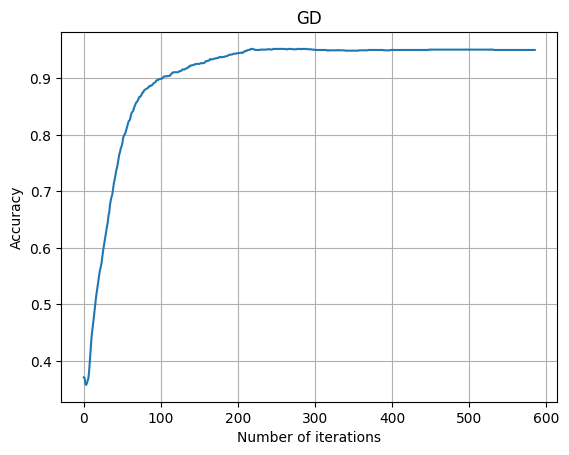

In [289]:
plt.plot(accuracies)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('GD')
plt.grid()
plt.show()

$$
\tag{HB}
x_{k+1} = x_k - \alpha \nabla f(x_k) + \beta (x_k - x_{k-1})$$ 
Fix a step $\alpha = \frac{1}{L}$ and search for different values of the momentum $\beta$ from $-1$ to $1$. Choose your own convergence criterion and plot convergence for several values of momentum on the same graph. Is the convergence always monotonic?

In [302]:
def heavy_ball(A_train, b_train, A_test, b_test, x0, lambda_, L, momentum, max_iter=1000):
    grad_norms = []
    x_prev = x0.copy()
    x = x0.copy()
    lr = 1 / L
    for i in range(max_iter):
        grad = grad_f(A_train, b_train, x, lambda_)
        x_new = x - lr * grad + momentum * (x - x_prev)
        x_prev = x
        x = x_new
        grad_norms.append(grad.T @ grad)
        if grad_norms[-1] < 1e-5:
            break
    return grad_norms

In [303]:
results = []

momentums = np.linspace(-1, 1, 21)

np.random.seed(228)
for momentum in momentums:
    results.append(heavy_ball(A_train, b_train, A_test, b_test, np.random.randn(A_train.shape[1]), lambda_, L, momentum))

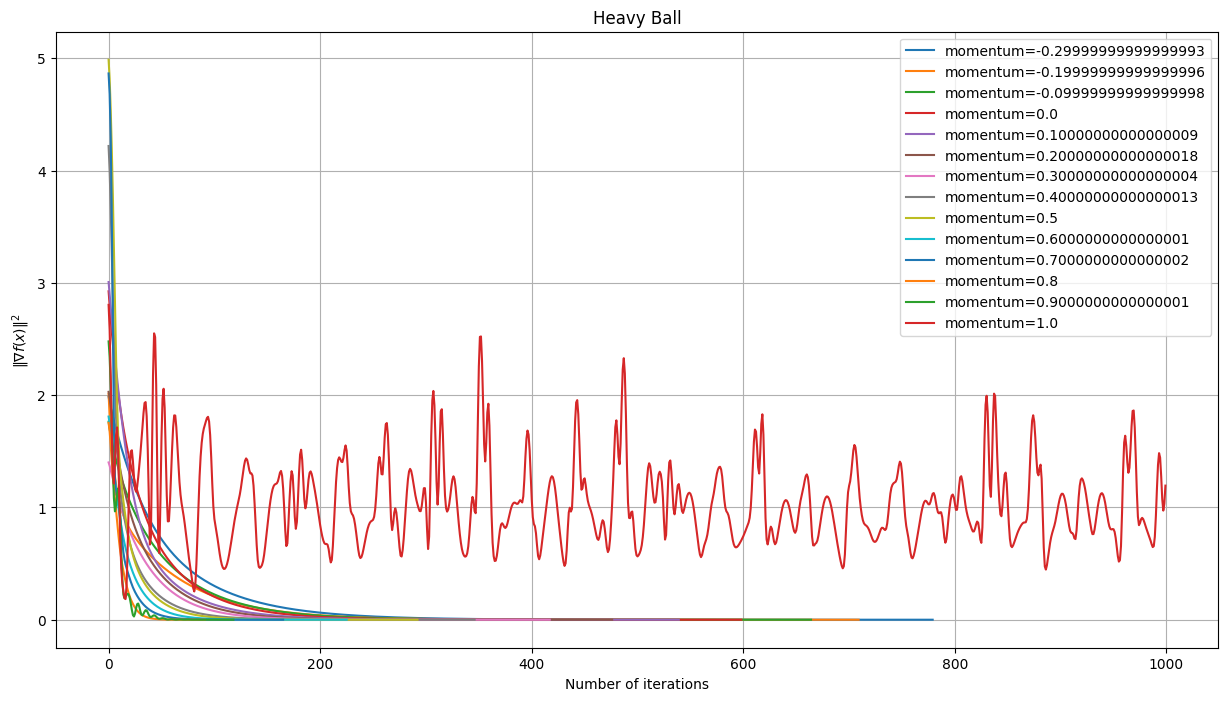

In [327]:
plt.figure(figsize=(15, 8))

for i in range(momentums.shape[0]):
    if i >= 7:
        plt.plot(results[i], label=f'momentum={momentums[i]}')

plt.xlabel('Number of iterations')
plt.ylabel(r'$\|\nabla f(x)\|^2$')
plt.title('Heavy Ball')
plt.legend()
plt.grid()
plt.show()

Понятное дело, что далеко не всегда сходимость получается монотонная. Если взять большой отрицательный моментум, то вообще будет расходимость.

6. For the best value of momentum $\beta$, plot the dependence of the model accuracy on the test sample on the running time of the method. Add to the same graph the convergence of gradient descent with step $\frac{1}{L}$. Draw a conclusion. Ensure, that you use the same value of $\lambda$ for both methods.

In [330]:
def heavy_ball(A_train, b_train, A_test, b_test, x0, lambda_, L, momentum, max_iter=1000):
    accuracies = []
    x_prev = x0.copy()
    x = x0.copy()
    lr = 1 / L
    for i in range(max_iter):
        grad = grad_f(A_train, b_train, x, lambda_)
        x_new = x - lr * grad + momentum * (x - x_prev)
        x_prev = x
        x = x_new
        accuracies.append(accuracy(b_test, np.sign(A_test @ x)))
        if grad.T @ grad < 1e-5:
            break
    return accuracies

np.random.seed(228)
accuracies2 = heavy_ball(A_train, b_train, A_test, b_test, np.random.randn(A_train.shape[1]), lambda_, L, momentum=0.8)

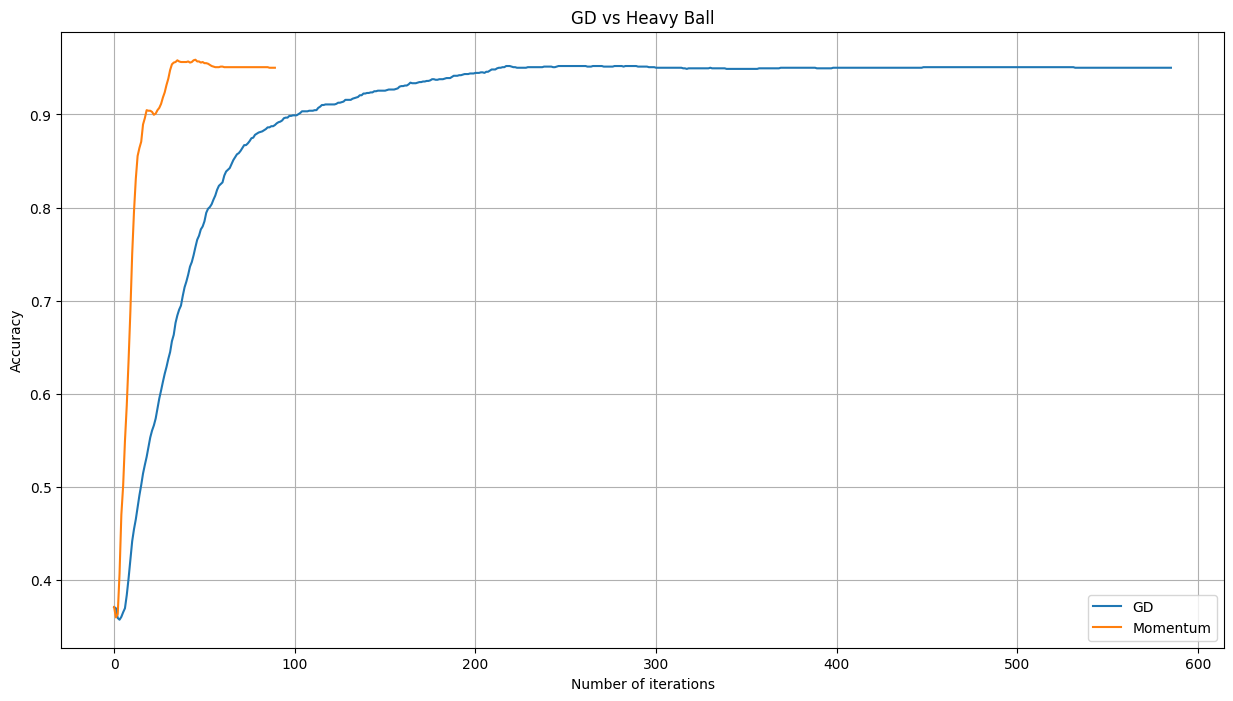

In [346]:
plt.figure(figsize=(15, 8))
plt.plot(accuracies, label='GD')
plt.plot(accuracies2, label='Momentum')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('GD vs Heavy Ball')
plt.legend()
plt.show()

Полагаю, слова излишни. Но а вообще momentum просто разъебал ванильный градиентный спуск не только по количество итераций, но и по accuracy.

7. Solve the logistic regression problem using the Nesterov method.
$$
\tag{NAG}
x_{k+1} = x_k - \alpha \nabla f(x_k + \beta (x_k - x_{k-1})) + \beta (x_k - x_{k-1})  
$$
Fix a step $\frac{1}{L}$ and search for different values of momentum $\beta$ from $-1$ to $1$. Check also the momentum values equal to $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ is the number of iterations), and if you are solving a strongly convex problem, also $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. Plot the convergence of the method as a function of the number of iterations (choose the convergence criterion yourself) for different values of the momentum. Is the convergence always monotonic?

In [333]:
def NAG(A_train, b_train, A_test, b_test, x0, lambda_, L, momentum, max_iter=1000):
    grad_norms = []
    x_prev = x0.copy()
    x = x0.copy()
    lr = 1 / L
    for i in range(max_iter):
        grad = grad_f(A_train, b_train, x + momentum * (x - x_prev), lambda_)
        x_new = x - lr * grad + momentum * (x - x_prev)
        x_prev = x
        x = x_new
        grad_norms.append(grad.T @ grad)
        if grad_norms[-1] < 1e-5:
            break
    return grad_norms

In [334]:
momentums = np.concatenate((np.linspace(-1, 1, 21), np.array([1000 / 1003, 1000 / 1002, 1000 / 1001, (np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu))])))
results_nag = []

np.random.seed(228)
for momentum in momentums:
    results_nag.append(NAG(A_train, b_train, A_test, b_test, np.random.randn(A_train.shape[1]), lambda_, L, momentum))


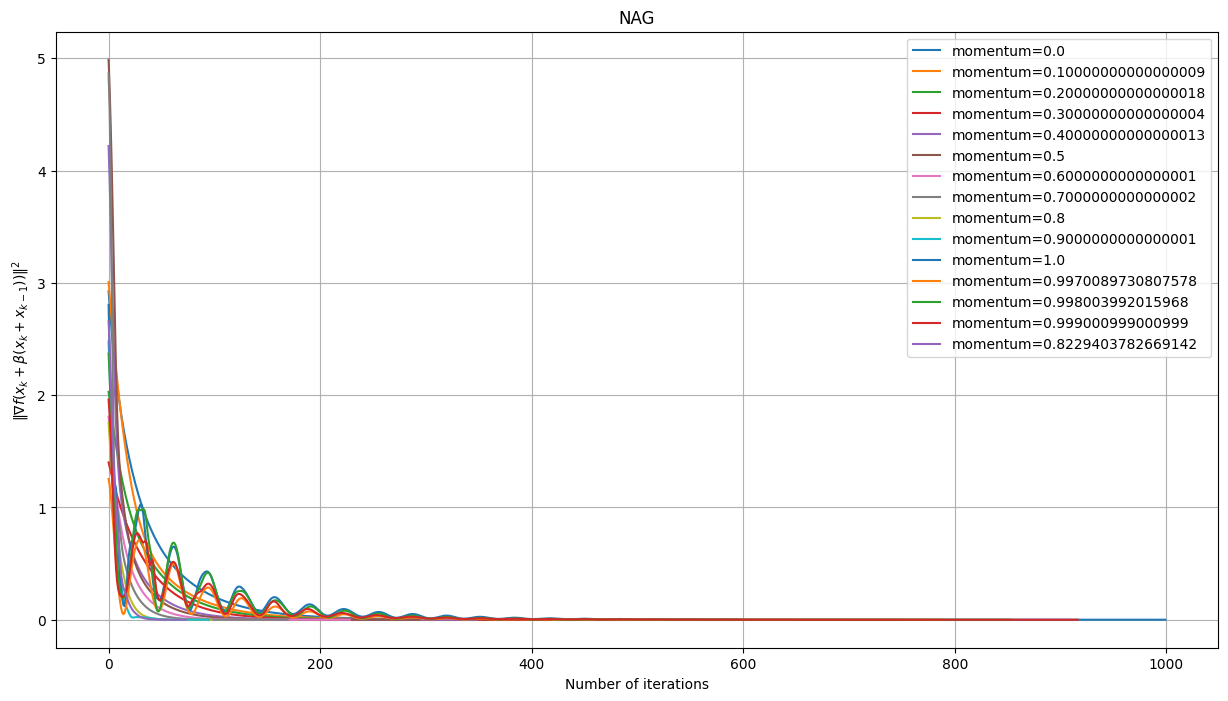

In [342]:
plt.figure(figsize=(15, 8))

for i in range(momentums.shape[0]):
    if i >= 10:
        plt.plot(results_nag[i], label=f'momentum={momentums[i]}')

plt.xlabel('Number of iterations')
plt.ylabel(r'$\|\nabla f(x_k + \beta(x_k + x_{k-1}))\|^2$')
plt.title('NAG')
plt.legend()
plt.grid()
plt.show()

Видим, что лучшим оказался $\beta = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$.Также прекрасно видно, что сходимость не всегда монотонная.

8. For the best value of momentum $\beta$, plot the dependence of the model accuracy on the test sample on the running time of the method. Add this graph to the graphs for the heavy ball and gradient descent from the previous steps. Make a conclusion.

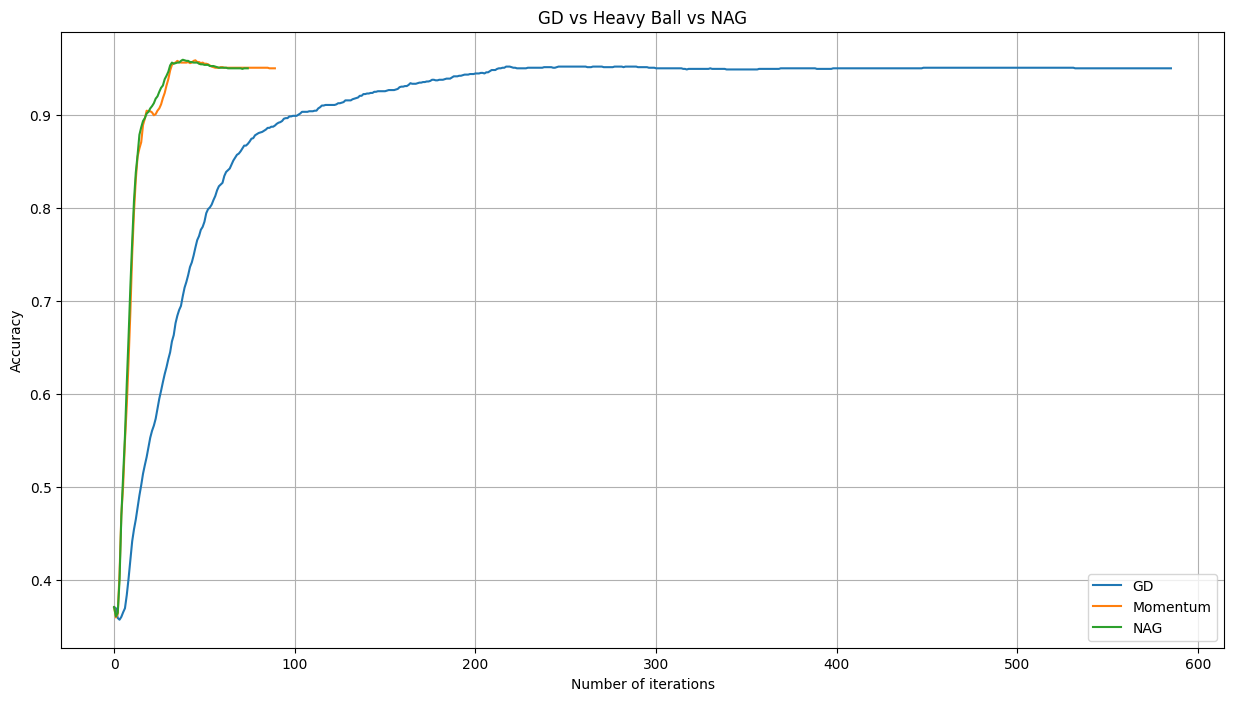

In [344]:
def NAG(A_train, b_train, A_test, b_test, x0, lambda_, L, momentum, max_iter=1000):
    accuracies = []
    x_prev = x0.copy()
    x = x0.copy()
    lr = 1 / L
    for i in range(max_iter):
        grad = grad_f(A_train, b_train, x + momentum * (x - x_prev), lambda_)
        x_new = x - lr * grad + momentum * (x - x_prev)
        x_prev = x
        x = x_new
        accuracies.append(accuracy(b_test, np.sign(A_test @ x)))
        if grad.T @ grad < 1e-5:
            break
    return accuracies

np.random.seed(228)
accuracies3 = NAG(A_train, b_train, A_test, b_test, np.random.randn(A_train.shape[1]), lambda_, L, momentum=(np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu)))
plt.figure(figsize=(15, 8))
plt.plot(accuracies, label='GD')
plt.plot(accuracies2, label='Momentum')
plt.plot(accuracies3, label='NAG')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('GD vs Heavy Ball vs NAG')
plt.legend()
plt.show()

Видим, что NAG сошёлся чуть быстрее моментума. По accuracy у них почти идентично. Но вообще немного странно, что они прям очень близки.

9. Now we drop the estimated value of $L$ and will try to do it adaptively. Let us make the selection of the constant $L$ adaptive.
$$
f(y) \leq f(x^k) + \langle \nabla f(x^k), y - x^k \rangle + \frac{L}{2}\|x^k - y\|_2^2
$$
In particular, the procedure might work:


In [348]:
def backtracking_L(f, grad, x, h, L0, rho, maxiter=100):
    L = L0
    fx = f(x)
    gradx = grad(x)
    iter = 0
    while iter < maxiter :
        y = x - 1 / L * h
        if f(y) <= fx - 1 / L * gradx.dot(h) + 1 / (2 * L) * h.dot(h):
            break
        else:
            L = L * rho

        iter += 1
    return L

What should $h$ be taken as? Should $\rho$ be greater or less than $1$? Should $L_0$ be taken as large or small? Draw a similar figure as it was in the previous step for L computed adaptively (6 lines - GD, HB, NAG, GD adaptive L, HB adaptive L, NAG adaptive L)

В качестве h (направления) возьмём просто $\nabla f(x)$, потому что в коде есть такое ```y = x - 1 / L * h```. $L_0$ должно быть маленьким, чтобы в дальнейшем оно увеличивалось. Ну и соответственно $\rho > 1$, всё по той же причине. 

In [352]:
def f(x, A=A_train, b=b_train, l=lambda_):
    return np.log(1 + np.exp(-(A @ x) * b)).mean() + l / 2 * x.T @ x

def grad_f(x, A=A_train, b=b_train, l=lambda_):
    return -((A * b[:, None]) / (1 + np.exp((A @ x) * b))[:, None]).mean(axis=0) + l * x

def ada_gradient_descent(A_train, b_train, A_test, b_test, x0, lambda_, L0, max_iter=1000):
    accuracies = []
    x = x0.copy()
    for i in range(max_iter):
        grad = grad_f(x, A_train, b_train, lambda_)
        L = backtracking_L(f, grad_f, x, grad, L0, rho=1.1)
        lr = 1 / L
        x -= lr * grad
        b_pred = np.sign(A_test @ x)
        accuracies.append(accuracy(b_test, b_pred))
        if grad.T @ grad < 1e-5:
            break
    return accuracies

def ada_heavy_ball(A_train, b_train, A_test, b_test, x0, lambda_, L0, momentum, max_iter=1000):
    accuracies = []
    x_prev = x0.copy()
    x = x0.copy()
    for i in range(max_iter):
        grad = grad_f(x, A_train, b_train, lambda_)
        L = backtracking_L(f, grad_f, x, grad, L0, rho=1.1)
        lr = 1 / L
        x_new = x - lr * grad + momentum * (x - x_prev)
        x_prev = x
        x = x_new
        accuracies.append(accuracy(b_test, np.sign(A_test @ x)))
        if grad.T @ grad < 1e-5:
            break
    return accuracies

def ada_NAG(A_train, b_train, A_test, b_test, x0, lambda_, L0, momentum, max_iter=1000):
    accuracies = []
    x_prev = x0.copy()
    x = x0.copy()
    for i in range(max_iter):
        grad = grad_f(x + momentum * (x - x_prev), A_train, b_train, lambda_)
        L = backtracking_L(f, grad_f, x, grad, L0, rho=1.1)
        lr = 1 / L
        x_new = x - lr * grad + momentum * (x - x_prev)
        x_prev = x
        x = x_new
        accuracies.append(accuracy(b_test, np.sign(A_test @ x)))
        if grad.T @ grad < 1e-5:
            break
    return accuracies

In [365]:
np.random.seed(228)
x0 = np.random.randn(A_train.shape[1])

accuracies_grad = ada_gradient_descent(A_train, b_train, A_test, b_test, x0, lambda_, 1)
accuracies_mom = ada_heavy_ball(A_train, b_train, A_test, b_test, x0, lambda_, 1, momentum=0.8)
accuracies_nag = ada_NAG(A_train, b_train, A_test, b_test, x0, lambda_, 1, momentum=0.8)

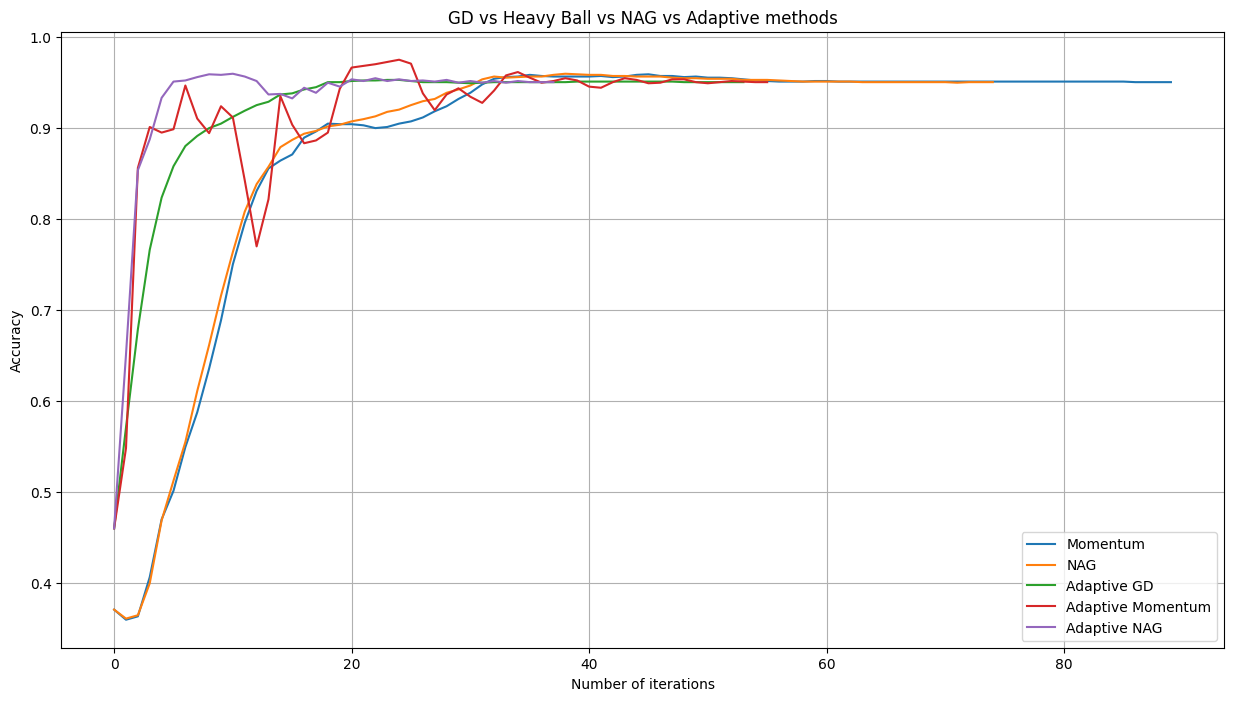

In [369]:
plt.figure(figsize=(15, 8))
# plt.plot(accuracies, label='GD')  # ну некрасиво он тут смотрится, поэтому я его убрал
plt.plot(accuracies2, label='Momentum')
plt.plot(accuracies3, label='NAG')
plt.plot(accuracies_grad, label='Adaptive GD')
plt.plot(accuracies_mom, label='Adaptive Momentum')
plt.plot(accuracies_nag, label='Adaptive NAG')
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('GD vs Heavy Ball vs NAG vs Adaptive methods')
plt.legend()
plt.show()

Тотальный разнос обычных методов методами с адаптивным lr: сходятся они прям быстрее. Другой вопрос, что accuracy можно сказать не улучшили, но как будто и так уже достаточно много.

## Subgradient Descent

### Task 1

Subgradient descent convergence with several stepsize strategies. [20 points] In this problem you will have to prove the convergence of subgradient descent ($x^{k+1} = x^k - \alpha_k g_k$) for several stepsize strategies.

#### Problem 1

First prove, that
$$
\|x^{k+1} - x^*\|_2^2 \leq \|x^{k} - x^*\|_2^2 - 2\alpha_k \left(f(x^k) - f^* \right) + \alpha^2_k \|g_k\|_2^2
$$


#### Solution 1

$$\|x_{k+1} - x^*\|^2_2 = \|x_k - x^* - \alpha_k g_k\|_2^2 = \|x_k-x^*\|_2^2+\alpha_k^2 \|g_k\|_2^2 - 2\alpha_k \langle g_k, x_k-x^*\rangle\leqslant$$

Из определения субградиента знаем, что $$f(y)\geqslant f(x) + \langle g_k, y-x\rangle\quad\forall x, y$$

То есть имеем $$f^*\geqslant f(x_k) + \langle g_k, x^*-x_k\rangle\iff f(x_k) - f^*\leqslant\langle g_k, x_k - x^*\rangle$$

$$\leqslant \|x_k-x^*\|_2^2+\alpha_k^2 \|g_k\|_2^2 - 2\alpha_k(f(x_k) - f^*)$$

#### Problem 2

Then, using $\|g\|_2 \leq G, \|x^0 - x^*\| \leq R$ prove, that
$$
\|x^{k+1} - x^*\|_2^2 \leq R^2 - 2\sum\limits_{i=1}^k\alpha_i \left(f(x^i) - f^* \right) + G^2\sum\limits_{i=1}^k\alpha^2_i
$$

#### Solution 2

Накинем сумму по всем k с двух сторон $$\sum_{i=0}^k\|x_{i+1} - x^*\|^2_2\leqslant \sum_{i=0}^k\|x_i-x^*\|_2^2+\sum_{i=0}^k\alpha_k^2 \|g_k\|_2^2 - 2\sum_{i=0}^k\alpha_k(f(x_k) - f^*)$$

Если расписать левую часть и первое слагаемое правой, то там там сократиться всё, кроме самого первого слагаемого и самого последнего $$\|x_{k+1} - x^*\|^2_2\leqslant \|x_0-x^*\|_2^2+\sum_{i=0}^k\alpha_k^2 \|g_k\|_2^2 - 2\sum_{i=0}^k\alpha_k(f(x_k) - f^*)\leqslant R^2+G^2\sum_{i=0}^k\alpha_k^2 - 2\sum_{i=0}^k\alpha_k(f(x_k) - f^*)$$

#### Problem 3

Then, using $f_k^{\text{best}} = \min\limits_{i=1,\ldots,k} f(x^i)$ prove, that
$$
f_k^{\text{best}} - f^* \leq \frac{R^2 + G^2\sum\limits_{i=1}^k\alpha^2_i}{2\sum\limits_{i=1}^k\alpha_i}
$$


#### Solution 3

$$0\leqslant R^2+G^2\sum_{i=0}^k\alpha_k^2 - 2\sum_{i=0}^k\alpha_k(f(x_k) - f^*)\leqslant R^2+G^2\sum_{i=0}^k\alpha_k^2 - 2(f_k^{\text{best}}-f^*)\sum_{i=0}^k\alpha_k$$ 

$$f_k^{\text{best}}-f^*\leqslant\frac{R^2+G^2\sum_{i=0}^k\alpha_k^2}{2\sum_{i=0}^k\alpha_k}$$

#### Constant step size $\alpha_k = \alpha$

$$f_k^{\text{best}}-f^*\leqslant\frac{R^2+G^2\alpha^2(k+1)}{2\alpha(k+1)} = \frac{R^2}{2\alpha(k+1)} + \frac{G^2\alpha}{2}\xrightarrow[k\to\infin]{}\frac{G^2\alpha}{2}$$

Ну и значит метод не сходится

#### Constant step length $\alpha_k = \frac{\gamma}{\|g_k\|_2}$ (so $\|x^{k+1} - x^k\|_2 = \gamma$)

$$f_k^{\text{best}}-f^*\leqslant\frac{R^2+G^2\gamma^2\sum\frac{1}{\|g_k\|_2^2}}{2\gamma\sum\frac{1}{\|g_k\|}}\leqslant\frac{R^2G+G^3\gamma^2\sum\frac{1}{\|g_k\|_2^2}}{2\gamma(k+1)}\xrightarrow[k\to\infin]{}0$$

Но вообще тут надо наложить некоторые требования: 

1. $\sum\frac{1}{\|g_k\|_2^2}$ должен сходится, причём он должен расти медленее, чем k при $k\to\infin$
2. По-хорошему, надо бы исключать все близкие к нулю значения нормы субградиента, если это возмножно

Ну и в случае выполнения этих требований ряд будет сходится сублинейно.

#### Inverse square root $\frac{R}{G\sqrt{k}}$

$$f_k^{\text{best}}-f^*\leqslant\frac{R^2+G^2\frac{R^2}{G^2}\sum_{i=0}^k\frac{1}{k}}{2\frac{R}{G}\sum_{i=0}^k\frac{1}{\sqrt{k}}}=\frac{RG+RG\sum_{i=0}^k\frac{1}{k}}{2\sum_{i=0}^k\frac{1}{\sqrt{k}}}$$

$\sum\frac{1}{k}\sim\ln(k) + \gamma$

$\sum\frac{1}{\sqrt{k}}\sim 2\sqrt{k}$

Эти оценки находятся по первой ссылке на math.stackexchange

Тогда получаем $$\frac{RG+RG\sum_{i=0}^k\frac{1}{k}}{2\sum_{i=0}^k\frac{1}{\sqrt{k}}}\sim\frac{RG+RG(\ln{k} + \gamma)}{4\sqrt{k}}\xrightarrow[k\to\infin]{}0$$

Получили сублинейную сходимость.

#### Inverse $\frac1k$

$$f_k^{\text{best}}-f^*\leqslant\frac{R^2+G^2\sum_{i=0}^k\frac{1}{k^2}}{2\sum_{i=0}^k\frac{1}{k}}\sim\frac{R^2+G^2\frac{\pi^2}{6}}{2(\ln(k) + \gamma)}\xrightarrow[k\to\infin]{}0$$

Получили сублинейную сходимость.

#### Polyak’s step size $\alpha_k = \frac{f(x^k) - f^*}{\|g_k\|_2^2}$

Тут немного откатимся назад ко второму пруфу $$\|x_{k+1} - x^*\|_2^2\leqslant\|x_k-x^*\|_2^2-2\frac{f(x_k)-f^*}{\|g_k\|_2^2}(f(x_k)-f^*)+\frac{(f(x_k)-f^*)^2}{\|g_k\|^4_2}\|g_k\|_2^2 $$

$$\frac{(f(x_k)-f^*)^2}{\|g_k\|^2_2}\leqslant\|x_k-x^*\|_2^2-\|x_{k+1}-x^*\|^2_2$$

Опять плотно накидываем сумму по всем k $$\sum_{i=0}^k\frac{(f(x_i)-f^*)^2}{\|g_k\|^2_2}\leqslant \sum_{i=0}^k\|x_i-x^*\|_2^2-\|x_{i+1}-x^*\|^2_2$$

$$(f_k^{\text{best}}-f^*)^2\sum_{i=0}^k\frac{1}{\|g_k\|^2_2}\leqslant\|x_0-x^*\|_2^2-\|x_{k+1}-x^*\|^2_2\leqslant\|x_0-x^*\|_2^2\leqslant R^2$$

$$f_k^{\text{best}}-f^*\leqslant\frac{R}{\sqrt{\sum_{i=0}^k\frac{1}{\|g_k\|^2_2}}}\leqslant\frac{RG}{\sqrt{k+1}}\xrightarrow[k\to\infin]{}0$$

Получили сублинейную сходимость.

### Task 2

Finding a point in the intersection of convex sets. [30 points] Let $A \in \mathbb{R}^{n \times n}$ be a positive definite matrix and let $\Sigma$ be an $n \times n$ diagonal matrix with diagonal entries $\sigma_1,...,\sigma_n > 0$, and $y$ a given vector in $\mathbb{R}^n$. Consider the compact convex sets $U = \{x \in \mathbb{R}^n \mid \|A^{1/2}(x-y)\|_2 \leq 1\}$ and $V = \{x \in \mathbb{R}^n \mid \|\Sigma x\|_\infty \leq 1\}$.

Minimize maximum distance from the current point to the convex sets.
$$
  \min_{x\in\mathbb{R}^n} f(x) =  \min_{x\in\mathbb{R}^n} \max\{\mathbf{dist}(x, U), \mathbf{dist}(x, V)\}
  $$
propose an algorithm to find a point $x \in U \cap V$. You can assume that $U \cap V$ is not empty. Your algorithm must be provably converging (although you do not need to prove it and you can simply refer to the lecture slides).
Implement your algorithm with the following data: $n = 2$, $y = (3, 2)$, $\sigma_1 = 0.5$, $\sigma_2 = 1$,
$$
  A = \begin{bmatrix}
  1 & 0 \\
  -1 & 1
  \end{bmatrix},
  $$
and $x = (2, 1)$. Plot the objective value of your optimization problem versus the number of iterations.

<img src="Screenshot 2024-05-19 at 2.14.05 PM.png" alt="drawing" width="500"/>

Как видно из картинки, наша задача сводится к последовательному проецированию точки на прямоугольник и овал. То есть алгоритм может быть записан как-то так:

1. Берём точку и ищем её проекцию на прямоугольник

2. Полученную проекцию проецируем на овал

3. Если это наша точка, то мы в шоколаде (как негры), иначе повторяем действия заново.

Как мы поймём, что это наша точка? Так как мы тут считаем, что пересечение непустое, значит мы просто можем посмотреть, насколько полученная точка близка к прямоугольнику: если близка, то кайф, если нет, то нет.

Как написано выше, доказательство писать не надо, но глобально мы тут пользуемся тем, что оператор проекции является нерасширяющим оператором, поэтому через какое-то количество шагов мы обязательно сойдёмся.

Разберёмся, как проецироваться на прямоугольник

In [462]:
def rectangle_proj(x, sigma):
    sigma1, sigma2 = sigma
    return np.array([np.sign(x[0]) * np.min([np.abs(x[0]), 1 / sigma1]), np.sign(x[1]) * np.min([np.abs(x[1]), 1 / sigma2])])

Теперь поймём, как проецироваться на овал. По определению $$\text{proj}_{U}(y)=\frac{1}{2}\argmin_{x\in U}\|x-y\|_2^2$$ При этом мы знаем, как задаётся $U$. Тогда запишем, это как задачу условной оптимизации

$$
\begin{split}
\frac{1}{2}\|x-y\|_2^2\to\displaystyle{\min_{x}}\\
\text{s.t.} \quad \|A^{1/2}(x-c)\|_2^2\leqslant1
\end{split}
$$

Что эквивалентно 
$$
\begin{split}
\frac{1}{2}\|x-y\|_2^2\to\displaystyle{\min_{x}}\\
\text{s.t.} \quad (x-c)^{\top}A(x-c)\leqslant1
\end{split}
$$

Запишем лагранжан для этого безобразия

$$\mathcal{L}(x) = \frac{1}{2}\|x - y\|_2^2 + \lambda \left((x-c)^{\top}A(x-c)-1\right)$$

$$\frac{\partial L}{\partial x}=x - y + 2\lambda Ax-2\lambda Ac=0$$

$$x(\text{I}+2\lambda A) - y - 2\lambda Ac=0\implies x = (y + 2\lambda Ac)(\text{I} + 2\lambda A)^{-1}$$

Вообще я попробывал явно найти $\lambda$, но там что-то очень тухлое получилось. Поэтому идея на миллион: будем подбирать $\lambda$ так, чтобы точка лежала в овале.

Ах, да: в условии написано, что на вход приходит положительно определённая матрица, но в самом задании дают другую матрицу. Поэтому чуть выше $2A$ надо заменить на $A + A^{\top}$

In [455]:
def oval_proj(y, A, c, lambda_ = 0.1):
    for i in range(100):
        x = (y + lambda_ * (A + A.T) @ c) @ np.linalg.inv(np.eye(2) + lambda_ * (A + A.T))

        if np.abs((x - c).T @ A @ (x - c) - 1) <= 1e-5:
            break
        elif (x - c).T @ A @ (x - c) > 1:
            lambda_ *= 1.1
        else:
            lambda_ *= 0.9
    return x

In [493]:
A = np.array([[1., 0,], [-1., 1.]])
sigma = np.array([.5, 1.])
c = np.array([3., 2.])
x = np.array([0, 0])
dist = [np.linalg.norm(x - rectangle_proj(x, sigma))]

for i in range(100):
    x = rectangle_proj(x, sigma)
    x = oval_proj(x, A, c)
    dist.append(np.linalg.norm(x - rectangle_proj(x, sigma)))
    if dist[-1] <= 1e-5:
        print('Done')
        break

Done


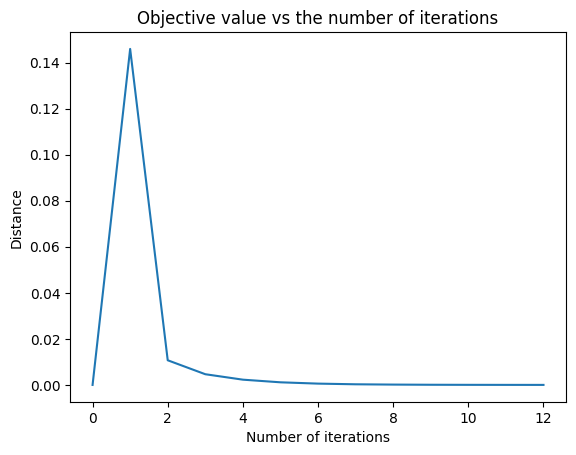

In [495]:
plt.plot(dist)
plt.xlabel('Number of iterations')
plt.ylabel('Distance')
plt.title('Objective value vs the number of iterations')
plt.show()

In [492]:
x

array([1.99999851, 1.0000094 ])

Точка совпала, все молодцы, всем хорошего вечера

## Conjugate gradients

Randomized Preconditioners for Conjugate Gradient Methods. [20 points]
Linear least squares
In this task, we explore the use of some randomization methods for solving overdetermined least-squares problems, focusing on conjugate gradient methods. Let $A \in \mathbb{R}^{m \times n}$ be a matrix (we assume that $m \gg n$) and $b \in \mathbb{R}^m$, we aim to minimize
$$
f(x) = \frac{1}{2} \|Ax - b\|^2_2 = \frac{1}{2} \sum_{i=1}^m (a_i^T x - b_i)^2,
$$
where the $a_i \in \mathbb{R}^n$ denote the rows of $A$.
Preconditioners
We know, that the convergence bound of the CG applied for the problem depends on the condition number of the matrix. Note, that for the problem above we have the matrix $A^T A$ and the condition number is squared after this operation ($\kappa (X^T X) =  \kappa^2 \left(X \right)$). That is the reason, why we typically need to use preconditioners (read 12. for more details) with CG.
The general idea of using preconditioners implies switchwing from solving $Ax = b$ to $MAx = Mb$ with hope, that $\kappa \left( MA\right) \ll \kappa \left( A\right)$ or eigenvalues of $MA$ are better clustered than those of $A$ (note, that matrix $A$ here is for the general case, here we have $A^TA$ instead).
This idea can also be viewed as coordinate change $x = T \hat{x}, \; \hat{x} = T^{-1}x$, which leads to the problem $T^T A T \hat{x} = T^Tb$. Note, that the spectrum of $T^TAT$ is the same as the spectrum of $MA$.
The best choice of $M$ is $A^{-1}$, because $\kappa (A^{-1} A) = \kappa (I) = 1$. However, if we know $A^{-1}$, the original problem is already solved, that is why we need to find some trade-off between enhanced convergence, and extra cost of working with $M$. The goal is to find $M$ that is cheap to multiply, and approximate inverse of $A$ (or at least has a more clustered spectrum than $A$).
Below you can find Vanilla CG algorithm (on the left) and preconditioned CG algorithm (on the right):
$$
\begin{aligned}
& \mathbf{r}_0 := \mathbf{b} - \mathbf{A x}_0 \\
& \hbox{if } \mathbf{r}_{0} \text{ is sufficiently small, then return } \mathbf{x}_{0} \text{ as the result}\\
& \mathbf{d}_0 := \mathbf{r}_0 \\
& k := 0 \\
& \text{repeat} \\
& \qquad \alpha_k := \frac{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k}{\mathbf{d}_k^\mathsf{T} \mathbf{A d}_k}  \\
& \qquad \mathbf{x}_{k+1} := \mathbf{x}_k + \alpha_k \mathbf{d}_k \\
& \qquad \mathbf{r}_{k+1} := \mathbf{r}_k - \alpha_k \mathbf{A d}_k \\
& \qquad \hbox{if } \mathbf{r}_{k+1} \text{ is sufficiently small, then exit loop} \\
& \qquad \beta_k := \frac{\mathbf{r}_{k+1}^\mathsf{T} \mathbf{r}_{k+1}}{\mathbf{r}_k^\mathsf{T} \mathbf{r}_k} \\
& \qquad \mathbf{d}_{k+1} := \mathbf{r}_{k+1} + \beta_k \mathbf{d}_k \\
& \qquad k := k + 1 \\
& \text{end repeat} \\
& \text{return } \mathbf{x}_{k+1} \text{ as the result}
\end{aligned} \qquad
\begin{aligned}
& \mathbf{r}_0 := \mathbf{b} - \mathbf{A x}_0 \\
& \text{if } \mathbf{r}_0 \text{ is sufficiently small, then return } \mathbf{x}_0 \text{ as the result} \\
& \mathbf{z}_0 := \mathbf{M}^{-1} \mathbf{r}_0 \\
& \mathbf{d}_0 := \mathbf{z}_0 \\
& k := 0 \\
& \text{repeat} \\
& \qquad \alpha_k := \frac{\mathbf{r}_k^\mathsf{T} \mathbf{z}_k}{\mathbf{d}_k^\mathsf{T} \mathbf{A d}_k} \\
& \qquad \mathbf{x}_{k+1} := \mathbf{x}_k + \alpha_k \mathbf{d}_k \\
& \qquad \mathbf{r}_{k+1} := \mathbf{r}_k - \alpha_k \mathbf{A d}_k \\
& \qquad \text{if } \mathbf{r}_{k+1} \text{ is sufficiently small, then exit loop} \\
& \qquad \mathbf{z}_{k+1} := \mathbf{M}^{-1} \mathbf{r}_{k+1} \\
& \qquad \beta_k := \frac{\mathbf{r}_{k+1}^\mathsf{T} \mathbf{z}_{k+1}}{\mathbf{r}_k^\mathsf{T} \mathbf{z}_k} \\
& \qquad \mathbf{d}_{k+1} := \mathbf{z}_{k+1} + \beta_k \mathbf{d}_k \\
& \qquad k := k + 1 \\
& \text{end repeat} \\
& \text{return } \mathbf{x}_{k+1} \text{ as the result}
\end{aligned}
$$
Hadamard matrix
Given $m \in \{2^i, i = 1, 2, \ldots\}$, the (unnormalized) Hadamard matrix of order $m$ is defined recursively as
$$
H_2 = \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}, \quad \text{and} \quad H_m = \begin{bmatrix} H_{m/2} & H_{m/2} \\ H_{m/2} & -H_{m/2} \end{bmatrix}.
$$
The associated normalized Hadamard matrix is given by $H^{(\text{norm})}_m = \frac{1}{\sqrt{m}} H_m$, which evidently satisfies $H^{(\text{norm})T}_m H^{(\text{norm})}_m = I_{m \times m}$. Moreover, via a recursive algorithm, it is possible to compute matvec $H_m x$ in time $O(m \log m)$, which is much faster than $m^2$ for a general matrix.
To solve the least squares minimization problem using conjugate gradients, we must solve $A^T A x = A^T b$. Using a preconditioner $M$ such that $M \approx A^{-1}$ can give substantial speedup in computing solutions to large problems.
Consider the following scheme to generate a randomized preconditioner, assuming that $m = 2^i$ for some $i$:

Let $S = \text{diag}(S_{11}, \ldots, S_{mm})$, where $S_{jj}$ are random $\{-1,+1\}$ signs
Let $p \in \mathbb{Z}^+$ be a small positive integer, say $20$ for this problem.
Let $R \in \{0, 1\}^{n+p \times m}$ be a row selection matrix, meaning that each row of $R$ has only 1 non-zero entry, chosen uniformly at random. (The location of these non-zero columns is distinct.)


In [1]:
import jax.numpy as jnp
from jax import random
import numpy as np

def create_row_selection_matrix_jax(m, n, p, key):
    # m is the number of columns in the original matrix A
    # n+p is the number of rows in the row selection matrix R
    # key is a PRNGKey needed for randomness in JAX
    inds = random.permutation(key, m)[:n+p]  # Generate a random permutation and select the first n+p indices
    R = jnp.zeros((n+p, m), dtype=jnp.int32)  # Create a zero matrix of shape (n+p, m)
    R = R.at[np.arange(n+p), inds].set(1)     # Use JAX's indexed update to set the entries corresponding to inds to 1
    return R

4. Define $\Phi = R H^{(\text{norm})}_m S \in \mathbb{R}^{n+p \times m}$

We then define the matrix ( M ) via its inverse $( M^{-1} = A^T \Phi^T \Phi A \in \mathbb{R}^{n \times n} )$.

1. (2 points) How many FLOPs (floating point operations, i.e. multiplication and additions) are required to compute the matrices $M^{-1}$ and $M$, respectively, assuming that you can compute the matrix-vector product $H_mv$ in time $m \log m$ for any vector $v \in \mathbb{R}^m$?


Запишем матрицу в следующем виде $$M^{-1} = A^\top S H^{\text{norm}\top}_m R^\top RH^{\text{norm}}_mSA = Q^\top Q$$

Теперь посчитаем количество flops для матрицы Q:

1. $SA$ -- диагональную матрицу на плотную можно умножить за $mn$

2. $H^{\text{norm}}_mSA$ -- быстро умножаем за $mn\log m$

3. $RH^{\text{norm}}_mSA$ -- тут просто переставляются столбцы, это ничего не стоит

Итого $mn + mn\log m$

Теперь считаем $Q^\top Q$, где $Q\in\mathbb{R}^{n+p\times m}$. Это стоит $n^2(2(n+p) - 1) = 2(n+p)n^2 - n^2$

Тогда общее количество flops $2(n+p)n^2 - n^2 + mn + mn\log m$

Чтобы посчить теперь обратную, надо добавить ещё $n^3$ операций.

2. (2 points) How many FLOPs are required to naively compute $A^T A$, assuming $A$ is dense (using standard matrix algorithms)?

$n^2(2m-1) = 2mn^2 - n^2$

Пояснение: при перемножении вектора с вектором происходит $m$ умножений и $m-1$ сложение

3. (2 points) How many FLOPs are required to compute $A^T A v$ for a vector $v \in \mathbb{R}^n$ by first computing $u = Av$ and then computing $A^T u$?

1. $A v$ --- $2mn-m$
2. $A^\top Av$ --- $2mn-n$

Итого $4mn - m -n$ flops

4. (4 points) Suppose that conjugate gradients runs for $k$ iterations. Using the preconditioned conjugate gradient algorithm with $M = (A^T \Phi^T \Phi A)^{-1}$, how many total floating point operations have been performed? How many would be required to directly solve $A^T A x = A^T b$? How large must $k$ be to make the conjugate gradient method slower?

Выпишем для каждой строки алгоритма её количество flops

1. $\mathbf{b} = \mathbf{A^\top b}$ --- $2mn - n$

2. ${r}_0 := \mathbf{b} - \mathbf{A x}_0$ --- $4mn - m - n + n$ (есть выше, ну и разность векторов)

3. $\mathbf{z}_0 := \mathbf{M}^{-1} \mathbf{r}_0$ --- $2n^2 - n$

4. $\alpha_k := \frac{\mathbf{r}_k^\mathsf{T} \mathbf{z}_k}{\mathbf{d}_k^\mathsf{T} \mathbf{A d}_k}$ -- $2n -1 + 4mn -m -n +2n-1 + 1$ (есть выше, два скалярных произведения и деление)

5. $\mathbf{x}_{k+1} := \mathbf{x}_k + \alpha_k \mathbf{d}_k$ --- $2n$ (умножение на скаляр и сумма)

6. $\mathbf{r}_{k+1} := \mathbf{r}_k - \alpha_k \mathbf{A d}_k$ --- $4mn - m -n + n+n$ (есть выше, умножение на скаляр и сумма)

7. $\mathbf{z}_{k+1} := \mathbf{M}^{-1} \mathbf{r}_{k+1}$ --- $2n^2 - n$ (есть выше)

8. $\beta_k := \frac{\mathbf{r}_{k+1}^\mathsf{T} \mathbf{z}_{k+1}}{\mathbf{r}_k^\mathsf{T} \mathbf{z}_k}$ --- $2n-1 + 2n-1 +1$ (два скалярных произведения и деление)

9. $\mathbf{d}_{k+1} := \mathbf{z}_{k+1} + \beta_k \mathbf{d}_k$ --- $2n$ (умножение на скаляр и сумма)

После $k$ итераций будет $$k (8mn-2m+2n^2+11n-1) + 6mn - m + 2n^2-2n+2(n+p)n^2-n^2+mn+mn\log m$$

Чтобы посчитать решение в тупую надо 

1. $A^\top b$ --- $2mn-n$

2. $A^\top A$ -- $2mn^2-n^2$

3. $(A^\top A)^{-1}$ --- $n^3$

4. $(A^\top A)^{-1}A^\top b$ --- $2mn-n$

Итого $2mn^2+2mn+n^2-2n+n^3$ flops

Теперь найдём нужное $k$ $$k (8mn-2m+2n^2+11n-1) + 6mn - m + 2n^2-2n+2(n+p)n^2-n^2+mn+mn\log m \geqslant 2mn^2+2mn+n^2-2n+n^3$$ 

$$k \geqslant \frac{2mn^2+2mn+n^2-2n+n^3 - (6mn - m + 2n^2-2n+2(n+p)n^2-n^2+mn+mn\log m)}{8mn-2m+2n^2+11n-1}=$$

$$=\frac{2mn^2 - n^3 -mn(5+\log m)+\dots}{8mn+\dots}\approx\frac{1}{4}n-\frac{1}{8}(5+\log m)$$

5. (10 points) Implement the conjugate gradient algorithm for solving the positive definite linear system $A^T A x = A^T b$ both with and without the preconditioner $M$. To generate data for your problem, set $m = 2^{12}$ and $n = 400$, then generate the matrix $A$ and the vector $b$. For simplicity in implementation, you may directly pass $A^T A$ and $A^T b$ into your conjugate gradient solver, as we only wish to explore how the methods work.

In [2]:
import numpy as np
from scipy.sparse import diags

m = 2**12  # 4096
n = 400
# Create a linear space of values from 0.001 to 100
values = np.linspace(0.001, 100, n)
# Generate the matrix A
A = np.random.randn(m, n) @ diags(values).toarray()
b = np.random.randn(m)

In [3]:
def preconditional_conjugate_gradient(A, b, x0, M_inv, k=100):
    residuals = np.zeros(k + 1)
    r = b - A @ x0
    residuals[0] = np.linalg.norm(r)
    if np.linalg.norm(r) < 1e-5:
        return x0
    z = M_inv @ r
    d = z.copy()
    x = x0.copy()
    for i in range(k):
        res = (r * z).sum()
        alpha = res / (d.T @ A @ d)
        x += alpha * d
        r -= alpha * A @ d
        if np.linalg.norm(r) < 1e-5:
            break
        z = M_inv @ r
        beta = (r * z).sum() / res
        d = z + beta * d
        residuals[i + 1] = np.linalg.norm(r)
    return x, residuals / np.linalg.norm(b)

In [4]:
def conjugate_gradient(A, b, x0, k=100):
    residuals = np.zeros(k + 1)
    r = b - A @ x0
    residuals[0] = np.linalg.norm(r)
    if np.linalg.norm(r) < 1e-5:
        return x0
    d = r.copy()
    x = x0.copy()
    for i in range(k):
        res = (r * r).sum()
        alpha = res / (d.T @ A @ d)
        x += alpha * d
        r -= alpha * A @ d
        if np.linalg.norm(r) < 1e-5:
            break
        beta = (r * r).sum() / res
        d = r + beta * d
        residuals[i + 1] = np.linalg.norm(r)
    return x, residuals / np.linalg.norm(b)

In [16]:
import scipy
R = create_row_selection_matrix_jax(m, n, 20, random.PRNGKey(228))
H = scipy.linalg.hadamard(m) / np.sqrt(m)
np.random.seed(228)
S = np.diag(np.random.choice([-1, 1], m))
# x0 = np.random.randn(n)
x0 = np.zeros(n)
Phi = R @ H @ S
PA = Phi @ A
M_inv = PA.T @ PA

x, res = conjugate_gradient(A.T @ A, A.T @ b, x0, k=100)
x_cond, res_cond = preconditional_conjugate_gradient(A.T @ A, A.T @ b, x0, M_inv, k=100)

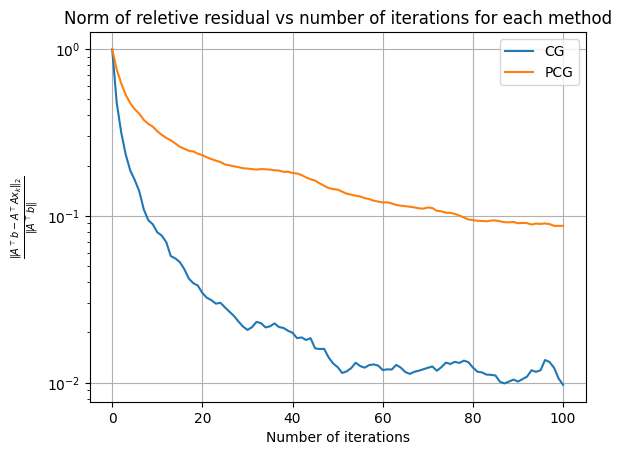

In [17]:
import matplotlib.pyplot as plt
plt.plot(res, label='CG')
plt.plot(res_cond, label='PCG')
plt.xlabel('Number of iterations')
plt.ylabel(r'$\frac{\|A^{\top} b - A^{\top} A x_k\|_2}{\|A^{\top}b\|}$')
plt.title('Norm of reletive residual vs number of iterations for each method')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

Этот график показался мне очень странным. Типа как так, мы пытаемся улучшить задачу, а стало только хуже. Я решил разобраться в алгосе и оказалось, что тут банально ошибка. Надо использовать не $M^{-1}$, а $M$. Тогда всё становится на свои места: вот зачем нас просили считать $M$.

Наводку на это мне подкинул Саша Гапонов.

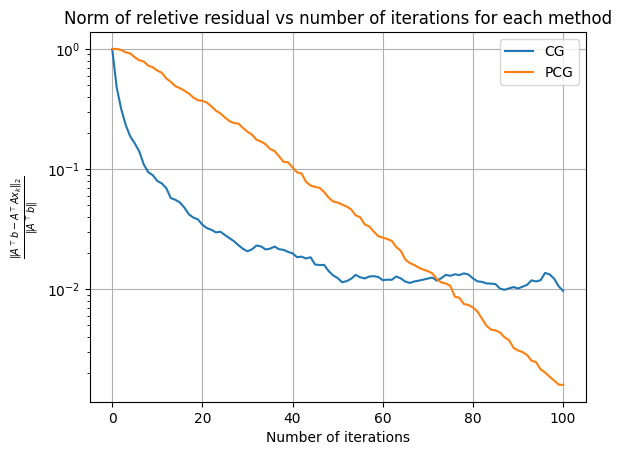

In [18]:
import scipy
R = create_row_selection_matrix_jax(m, n, 20, random.PRNGKey(228))
H = scipy.linalg.hadamard(m) / np.sqrt(m)
np.random.seed(228)
S = np.diag(np.random.choice([-1, 1], m))
# x0 = np.random.randn(n)
x0 = np.zeros(n)
Phi = R @ H @ S
PA = Phi @ A
M_inv = PA.T @ PA

x_cond, res_cond = preconditional_conjugate_gradient(A.T @ A, A.T @ b, x0, np.linalg.inv(M_inv), k=100)
plt.plot(res, label='CG')
plt.plot(res_cond, label='PCG')
plt.xlabel('Number of iterations')
plt.ylabel(r'$\frac{\|A^{\top} b - A^{\top} A x_k\|_2}{\|A^{\top}b\|}$')
plt.title('Norm of reletive residual vs number of iterations for each method')
plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

Вооот, теперь прям хорошо.

In [23]:
print(f'Cond number of A.T @ A is {np.linalg.cond(A.T @ A)}')
M_sqrt = scipy.linalg.sqrtm(np.linalg.inv(M_inv))
print(f'Cond number of M^1/2 @ A^T @ A @ M^1/2 is {np.linalg.cond(M_sqrt @ A.T @ A @ M_sqrt)}')

Cond number of A.T @ A is 12891937025.669561
Cond number of M^1/2 @ A^T @ A @ M^1/2 is 4657.180342163481


## Gradient methods for conditional problems

🐺 Frank - Wolfe vs Projected gradient descent [20 points]
Consider the following simple quadratic optimization problem
$$
f(w) = \frac12 \langle Ax, x \rangle - \langle b, x \rangle \to \min\limits_{x \in \mathbb{R}^n; \; 1^\top x = 1, \; x \succeq 0}
$$

1. Generate and solve this problem numerically with CVXPY. Calculate optimal solution x_optimal

In [636]:
import jax
from jax import numpy as jnp
from jax import random
from jax import grad

def generate_problem(n, mu=0, L = 10):
    RNG = random.PRNGKey(0)

    U = random.normal(RNG, (n, n))
    Q, _ = jnp.linalg.qr(U)
    Lambda = jnp.diag(jnp.linspace(mu, L, n, endpoint=True))
    A = Q @ Lambda @ Q.T

    RNG, _ = random.split(RNG)
    b = random.normal(RNG, (n, 1))

    def f(x, A=A, b=b):
        return 1/2 * x.T @ A @ x - b.T @ x

    RNG, _ = random.split(RNG)
    x_0 = jnp.zeros(n)
    idx = random.randint(RNG, (1,), 0, n)
    x_0 = x_0.at[idx].set(1.0)

    return f, A, b, x_0

import cvxpy as cp
def compute_optimal(A, b):
    # https://www.cvxpy.org/tutorial/intro/index.html
    # https://www.cvxpy.org/tutorial/functions/index.html
    x = cp.Variable(A.shape[1])
    obj = cp.Minimize(0.5 * cp.quad_form(x, A) - b.T @ x) # если прописывать x.T @ A @ x не работает (((
    constraints = [x >= 0, cp.sum(x) == 1]
    prob = cp.Problem(obj, constraints)
    solution = prob.solve()
    return x.value, solution

def grad_f(x, A, b): # напишем свою функцию для градиента, ведь jax помойка, в которой даже по вектору производную взять нельзя. хотя мб можно, я просто сделал один запрос в гугле
    return 0.5 * (A + A.T) @ x - b.ravel()

In [613]:
f, A, b, x_0 = generate_problem(10)
compute_optimal(A, b)

(array([-4.13222731e-07,  4.00547923e-02,  2.62053511e-01, -3.76381904e-07,
         1.23505601e-01,  2.39963005e-01,  2.14015874e-01,  1.05660283e-01,
         1.47470466e-02,  6.77331114e-07]),
 -0.3768956717302449)

2. In this problem you will consider 2 algorithms for solving this problem (Frank - Wolfe and Projected Gradient Descent). Let’s start with PGD. Write down the function, that calculates Euclidian projection on the simplex:

Взял [отсюда](https://arxiv.org/pdf/1309.1541)
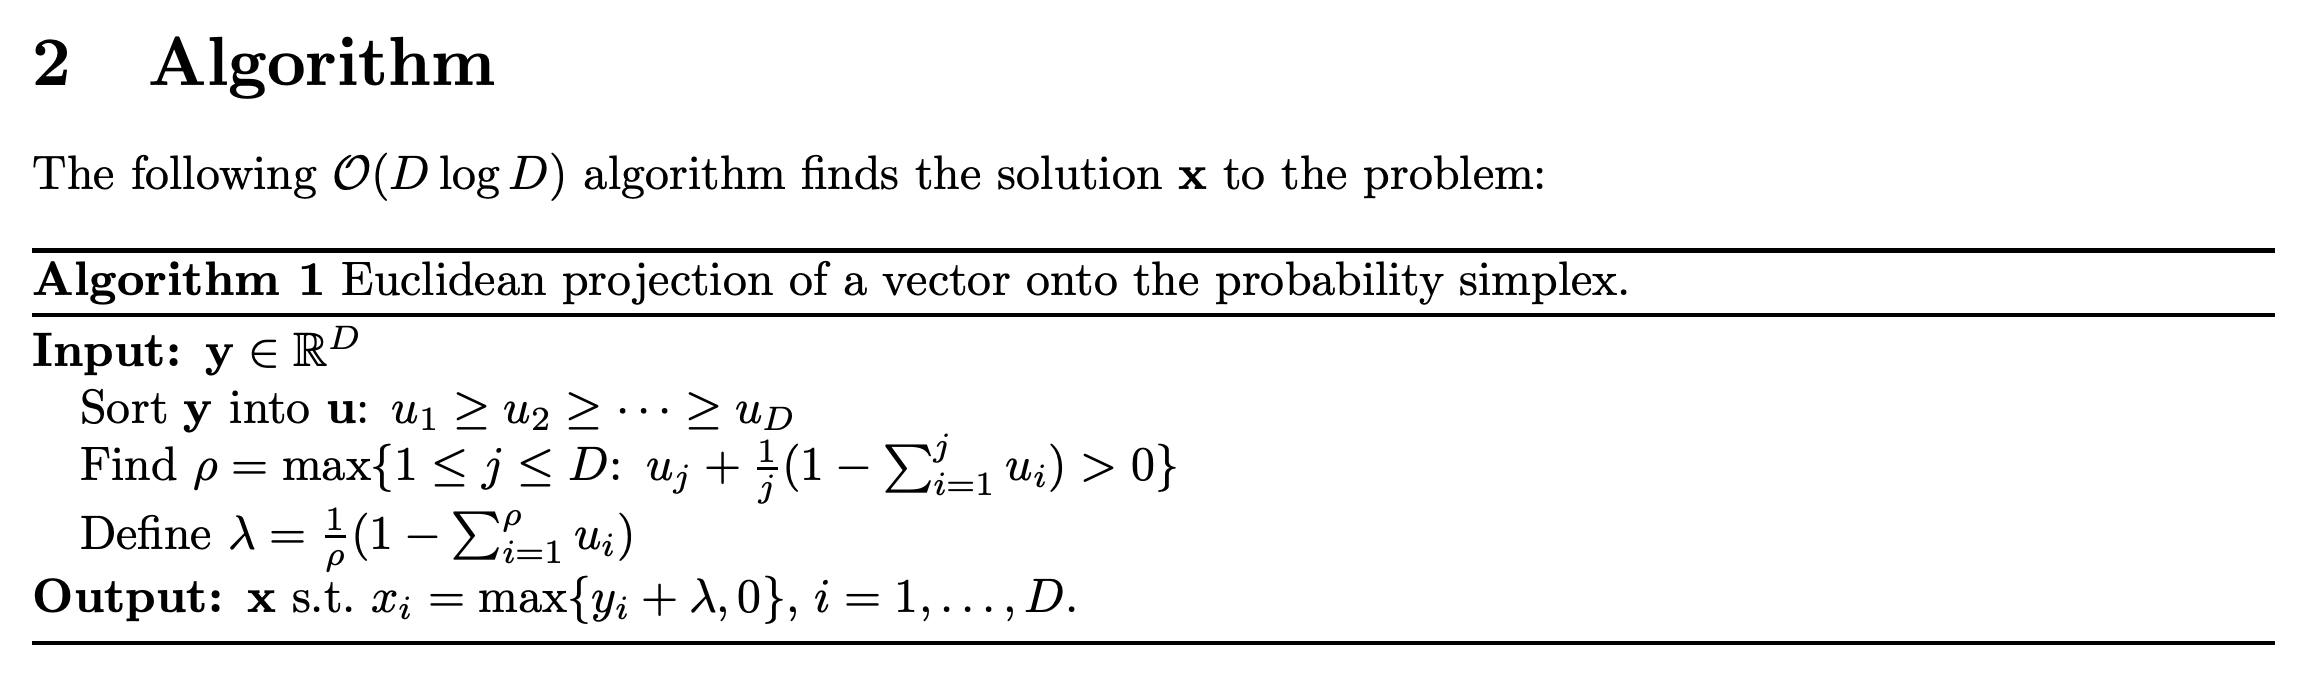

In [614]:
def projection(y):
    u = -np.sort(-y) # fast alias for np.sort(y)[::-1]
    cumsum = np.cumsum(u)
    rhos_mask = u + 1 / np.arange(1, u.shape[0] + 1) * (1 - cumsum) > 0
    rho = np.max(np.arange(1, u.shape[0] + 1)[rhos_mask]).astype(int)
    l = 1 / rho * (1 - cumsum[rho - 1])
    x = np.maximum(y + l, 0)
    return x

3. Then, write the PGD method, that returns a trajectory list of iterations+1 points $x_0, x_1, \ldots x_k$ and time_trajectory list for a cumulative time spent after each iteration :

In [723]:
import time

def PGD(A, b, x_0, iterations=100):
    trajectory, time_trajectory = np.zeros((iterations + 1, x_0.shape[0])), []
    trajectory[0] = x_0
    x = x_0.copy()
    lr = 1e-1
    for i in range(iterations):
        start = time.time()
        x = projection(x - lr * grad_f(x, A, b))
        time_trajectory.append(time.time() - start)
        trajectory[i + 1] = x
    return trajectory, time_trajectory

4. Write down the FW method, that returns a trajectory list of iterations+1 points $x_0, x_1, \ldots x_k$ and time_trajectory list for a cumulative time spent after each iteration :

In [714]:
def FW(A, b, x_0, iterations=100):
    trajectory, time_trajectory = np.zeros((iterations + 1, x_0.shape[0])), []
    trajectory[0] = x_0
    x = x_0.copy()
    for i in range(iterations):
        gamma = 2 / (i + 3)
        start = time.time()
        # так как мы в симплексе, нам надо идти в ту вершниу, где антиградиент максимален. ну и вершина будет выглядит [0, 0, 1, ..., 0]
        s_k = np.zeros_like(x)
        s_k[np.argmax(-grad_f(x, A, b))] = 1
        x += gamma * (s_k - x)
        time_trajectory.append(time.time() - start)
        trajectory[i + 1] = x
    return trajectory, time_trajectory

5. Generate a convex problem ($\mu=0, L=10$) and compare the methods starting from the same $x_0$. For this reason plot 2 graphs - $f(x_k) - f^*$ from iteration counter and time spent for it.

In [699]:
def my_f(x, A, b):
    return 0.5 * np.sum((x @ A) * x, axis=1) - np.sum(b[None, :] * x, axis=1)

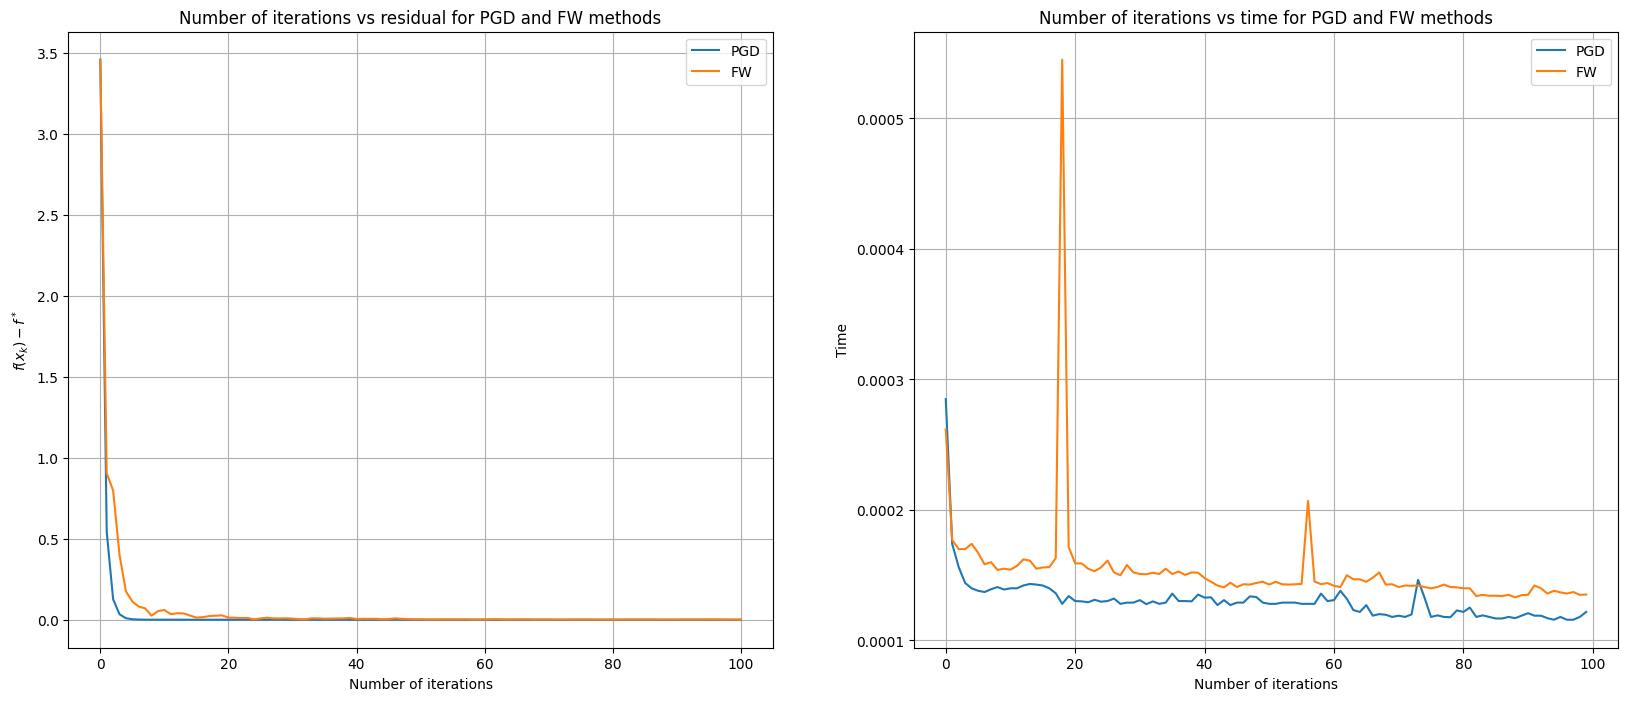

In [724]:
f, A, b, x_0 = generate_problem(10)
b = b.ravel()

trajectory_pgd, time_trajectory_pgd = PGD(A, b, x_0)
trajectory_fw, time_trajectory_fw = FW(A, b, x_0)

_, f_s = compute_optimal(A, b)

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].plot(my_f(trajectory_pgd, A, b) - f_s, label='PGD')
ax[0].plot(my_f(trajectory_fw, A, b) - f_s, label='FW')
ax[0].grid()
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel(r'$f(x_k) - f^*$')
ax[0].set_title('Number of iterations vs residual for PGD and FW methods')
ax[0].legend()

ax[1].plot(time_trajectory_pgd, label='PGD')
ax[1].plot(time_trajectory_fw, label='FW')
ax[1].grid()
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Time')
ax[1].set_title('Number of iterations vs time for PGD and FW methods')
ax[1].legend()


plt.show()

6. Generate a strongly convex problem ($\mu=1, L=10$) and compare the methods starting from the same $x_0$. For this reason plot 2 graphs - $f(x_k) - f^*$ from iteration counter and time spent for it.

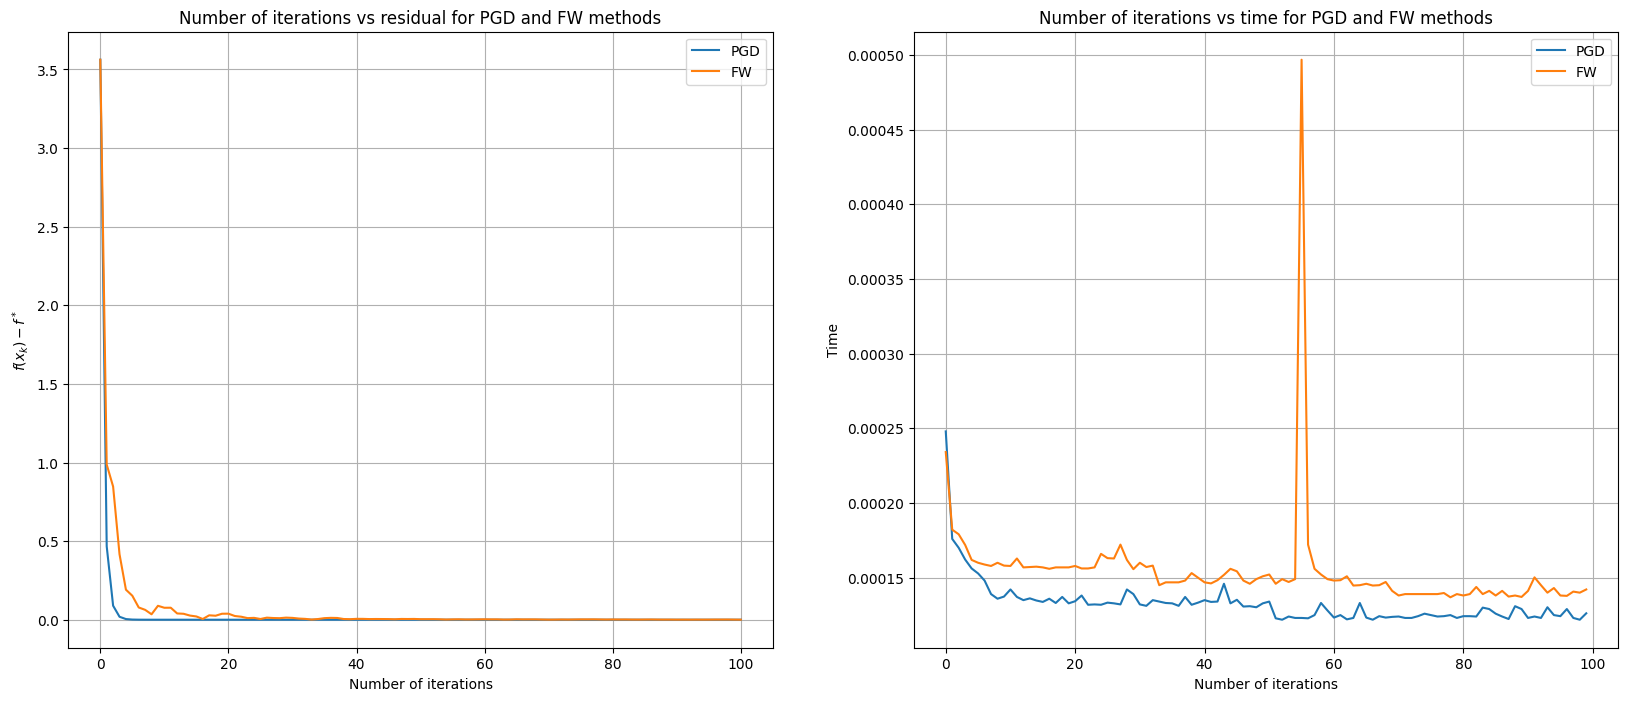

In [726]:
f, A, b, x_0 = generate_problem(10, mu=1)
b = b.ravel()

trajectory_pgd, time_trajectory_pgd = PGD(A, b, x_0)
trajectory_fw, time_trajectory_fw = FW(A, b, x_0)

_, f_s = compute_optimal(A, b)

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].plot(my_f(trajectory_pgd, A, b) - f_s, label='PGD')
ax[0].plot(my_f(trajectory_fw, A, b) - f_s, label='FW')
ax[0].grid()
ax[0].set_xlabel('Number of iterations')
ax[0].set_ylabel(r'$f(x_k) - f^*$')
ax[0].set_title('Number of iterations vs residual for PGD and FW methods')
ax[0].legend()

ax[1].plot(time_trajectory_pgd, label='PGD')
ax[1].plot(time_trajectory_fw, label='FW')
ax[1].grid()
ax[1].set_xlabel('Number of iterations')
ax[1].set_ylabel('Time')
ax[1].set_title('Number of iterations vs time for PGD and FW methods')
ax[1].legend()


plt.show()

Что в выпуклом, что в сильновыпуклом случаях видим одно и то же: Франк-Вульф оказывается медленнее и по времени на одну итерацию (что странно, ведь проекцию считать сложнее, хоть и считается она в данном случае за $\mathcal{O}(n\log n)$) и сходится медленнее, хоть и немного проигрывая PGD.